# Desafío 4: análisis y creación de modelo predictivo

## Participantes 

- Federico Mosquera
- Ignacio Nasso 
- Joaquín Fernandez
- Matías Almeida

# TOC:
* [Descripción del desafio](#1-bullet)
* [Sección 1](#2-bullet) Imputación de nulos y analisis descriptivo
* [Sección 2](#3-bullet) Creacion de nuevos features numericos y categoricos
* [Sección 3](#4-bullet) Preprocessing con OneHotEncoder y Scaler. Seleccion de columnas.
* [Modelos Iniciales](#5-bullet)
    * KNN
    * Regresión logistica
    * RandomForestClassifier
    * LightBGM
    * Gradientboostingclassifier
    * XGboost
    * Adaboost
* [Feature Selection y Modelo Final](#6-bullet) Elimación de features de forma recursiva a partir de un modelo de randomforest. El modelo final es "test_1". 
* [PCA - Lime](#7-bullet) Eliminación de features y explicación de su importancia
* [Preparado de Datos para Validación](#8-bullet) Generamos un .csv con el modelo entrenado para verificar el score de LogLoss que obtenemos en validación


## Objetivo 
Constituir un problema que se pueda abordar con Machine Learning, y apuntar a conocer un sector desconocido o poco
explotado hasta el momento. Se debe mostrar cómo los datos aportan valor al problema que se plantearon y construir un modelo válido que ayude con el problema en cuestión.


## Descripción del desafío <a class="anchor" id="1-bullet"></a>

El dataset seleccionado consiste en información recolectada de ventas de la empresa **"Frío Frío"**, dedicada a la venta e instalación de **equipos de aire acondicionado** para grandes superficies. Al ser una empresa B2B (“Business To Business”), es esencial para ellos optimizar los esfuerzos de los representantes comerciales, ayudándolos a priorizar las oportunidades en el pipeline.

Los datos contienen información respecto de cada posibilidad de venta de la empresa, considerando datos del producto que se está vendiendo, quién lo está vendiendo y los clientes. Es decir, cada fila de nuestro dataset es una "oportunidad de negocio", que consiste en cada proyecto de venta o instalación de equipos para un cliente. La variable que se está tratando de predecir es **“Probabilidad de éxito”** para cada oportunidad (esto se captura dentro de la columna _stage_, que puede adoptar dos valores "Closed lost" y "Close won"). 

En preve, con nuestro modelo buscaremos averiguar cuál es la probabilidad de que la oportunidad se convierta en un caso Closed Won (exitoso). 



#### Link a fuente de dataset

https://metadata.fundacionsadosky.org.ar/competition/20/


#### Variables del dataset: 

- ID: id único del registro (Entero).
- Región: región de la oportunidad (Categórica).
- Territory: territorio comercial de la oportunidad (Categórica).
- Pricing, Delivery_Terms_Quote_Approval: variable que denomina si la oportunidad necesita aprobación especial de su precio total y los términos de la entrega (Binaria).
- Pricing, Delivery_Terms_Approved: variable que denomina si la oportunidad obtuvo aprobación especial de su precio total y los términos de la entrega (Binaria).
- Bureaucratic_Code_0_Approval: variable que denomina si la oportunidad necesita el código burocrático 0 (Binaria).
- Bureaucratic_Code_0_Approved: variable que denomina si la oportunidad obtuvo el código burocrático 0 (Binaria).
- Submitted_for_Approval: variable que denomina si fue entregada la oportunidad para la aprobación (Binaria).
- Bureaucratic_Code: códigos burocráticos que obtuvo la oportunidad (Categórica).
- Account_Created_Date: fecha de creación de la cuenta del cliente (Datetime).
- Source: fuente de creación de la oportunidad (Categórica).
- Billing_Country: país donde se emite la factura (Categórica).
- Account_Name: nombre de la cuenta del cliente (Categórica).
- Opportunity_Name: nombre de la oportunidad (Categórica).
- Opportunity_ID: id de la oportunidad (Entero).
- Sales_Contract_No: número de contrato (Entero).
- Account_Owner: vendedor del equipo comercial responsable de la cuenta cliente (Categórica).
- Opportunity_Owner: vendedor del equipo comercial responsable de la oportunidad comercial (Categórica).
- Account_Type: tipo de cuenta cliente (Categórica).
- Opportunity_Type: tipo de oportunidad (Categórica).
- Quote_Type: tipo de presupuesto (Categórica).
- Delivery_Terms: términos de entrega (Categórica).
- Opportunity_Created_Date: fecha de creación de la oportunidad comercial (Datetime).
- Brand: marca del producto (Categórica).
- Product_Type: tipo de producto (Categórica).
- Size: tamaño del producto (Categórica).
- Product_Category_B: categoría 'B' del producto (Categórica).
- Price: precio (Decimal).
- Currency: moneda (Categórica).
- Last_Activity: fecha de la última actividad (Datetime).
- Quote_Expiry_Date: fecha de vencimiento del presupuesto (Datetime).
- Last_Modified_Date: fecha de ultima modificación en la oportunidad (Datetime).
- Last_Modified_By: usuario responsable de la última modificación en la oportunidad (Categórica).
- Product_Family: familia de producto (Categórica).
- Product_Name: nombre del producto (Categórica).
- ASP_Currency: moneda del precio promedio (Categórica).
- ASP: (Average Selling Price) precio promedio a la venta (Decimal).
- ASP_(converted)_Currency: moneda del precio promedio convertido en la variable (Categórica)
- ASP_(converted): precio promedio a la venta convertido a otra moneda (Decimal).
- Planned_Delivery_Start_Date: límite inferior del rango previsto para la fecha de entrega (Datetime).
- Planned_Delivery_End_Date: límite superior del rango previsto para la fecha de entrega (Datetime).
- Month: mes-año de Planned_Delivery_Start_Date (Fecha).
- Delivery_Quarter: trimestre de Planned_Delivery_Start_Date (Categorica).
- Delivery_Year: año de Planned_Delivery_Start_Date (Fecha).
- Actual_Delivery_Date: fecha real de la entrega (Datetime).
- Total_Power: potencia del producto (Entero).
- Total_Amount_Currency: moneda del monto total (Decimal).
- Total_Amount: monto total (Decimal).
- Total_Taxable_Amount_Currency: moneda del monto gravado total (Categórica).
- Total_Taxable_Amount: monto gravado total (Categórica).
- Stage: variable target. Estado de la oportunidad (Categórica).
- Prod_Category_A: categoría 'A' del producto (Categórica).
- Total_Power_Discreet: categorización de la variable Total Power en bins (Categórica).

## Sección 1: <a class="anchor" id="2-bullet"></a>
- Importación de librerías 
- Importación del dataset 
- Análisis descriptivo: eliminación de nulos y columnas que no se utilizarán

In [1]:
# Análisis de datos
import pandas as pd
import numpy as np
import datetime

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modelos de clasificación
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import log_loss

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Meta-modelos


In [2]:
data = pd.read_csv('dataframe.csv')

In [3]:
data["TRF"].value_counts()

0      11971
1       2192
2        627
3        354
5        297
       ...  
51         1
167        1
163        1
195        1
165        1
Name: TRF, Length: 101, dtype: int64

En primer lugar, vemos un sample del dataset para observar las columnas y en qué consisten sus valores. A su vez, vemos la información de cada columna.

In [4]:
data.head(3)

ID    Region   Territory  Pricing, Delivery_Terms_Quote_Appr  \
0  27761      EMEA        None                                   1   
1  27760      EMEA        None                                   0   
2  27446  Americas  NW America                                   0   

   Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
0                                 1                             1   
1                                 0                             0   
2                                 0                             0   

   Bureaucratic_Code_0_Approved  Submitted_for_Approval    Bureaucratic_Code  \
0                             1                       0  Bureaucratic_Code_4   
1                             0                       0  Bureaucratic_Code_4   
2                             0                       0  Bureaucratic_Code_4   

  Account_Created_Date  ... Delivery_Quarter Delivery_Year  \
0            6/16/2015  ...               Q2          2016   
1            6/16/2015  ...               Q1          2016   
2            4/21/2015  ...               Q1          2016   

  Actual_Delivery_Date TRF  Total_Amount_Currency Total_Amount  \
0                  NaT  10                    EUR    5272800.0   
1                  NaT   0                    EUR      48230.0   
2                  NaT   0                    USD      83865.6   

  Total_Taxable_Amount_Currency Total_Taxable_Amount        Stage  \
0                           EUR            5272800.0  Closed Lost   
1                           EUR              48230.0   Closed Won   
2                           USD              83865.6   Closed Won   

        Prod_Category_A  
0  Prod_Category_A_None  
1  Prod_Category_A_None  
2  Prod_Category_A_None  

[3 rows x 52 columns]

In [5]:
data.iloc[3,:]

ID                                                    16808
Region                                             Americas
Territory                                        NW America
Pricing, Delivery_Terms_Quote_Appr                        1
Pricing, Delivery_Terms_Approved                          0
Bureaucratic_Code_0_Approval                              1
Bureaucratic_Code_0_Approved                              0
Submitted_for_Approval                                    0
Bureaucratic_Code                       Bureaucratic_Code_5
Account_Created_Date                              7/27/2013
Source                                            Source_11
Billing_Country                               United States
Account_Name                              Account_Name_1201
Opportunity_Name                       Opportunity_Name_415
Opportunity_ID                                            3
Sales_Contract_No                                      None
Account_Owner                           

In [6]:
data.shape

(16947, 52)

In [7]:
data.Opportunity_ID.unique().shape  

(9841,)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

Podemos observar que el dataset cuenta con **52 columnas** y **16947 filas**. Esto nos brinda una gran cantida de datos para entrenar un  modelo. A su vez, contamos con 4 tipos de variables: **binarias, categóricas, numéricas y fechas**. Finalmente, hay 3 columnas (_ASP_, _ASP-(converted)_ y _Total-Amount_) que poseen **valores nulos**.

Para seguir, clasificamos las features en las 4 categorías mencionadas anteriormente.


In [9]:
data.rename(columns = {'Source ':'Source'},inplace=True)

In [10]:
# Clasificación de features 

binarias = ['Pricing, Delivery_Terms_Quote_Appr', 'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
            'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval'] 

categoricas = ['Region','Territory', 'Bureaucratic_Code', 'Source', 'Billing_Country', 'Account_Name',
              'Opportunity_Name', 'Account_Owner', 'Opportunity_Owner', 'Account_Type', 'Opportunity_Type',
              'Quote_Type', 'Delivery_Terms', 'Brand', 'Product_Type', 'Size', 'Product_Category_B', 
              'Last_Modified_By', 'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP_(converted)_Currency', 
              'Delivery_Quarter', 'Total_Amount_Currency', 'Total_Taxable_Amount_Currency', 'Prod_Category_A']

date = ['Account_Created_Date', 'Opportunity_Created_Date', 'Last_Activity', 'Quote_Expiry_Date', 
           'Last_Modified_Date', 'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
           'Delivery_Year', 'Actual_Delivery_Date']

numericas = ['ID', 'Sales_Contract_No', 'Price', 'ASP', 'ASP_(converted)', 'TRF', 'Total_Amount', 
            'Total_Taxable_Amount']
otras = ['Opportunity_ID']

Observamos los "Opportunity_ID" para ver que diferencias hay entre aquellos que poseen el mismo ID. Total_Taxable_Amount es la suma de Total_Amount del mismo ID.

In [11]:
data["Opportunity_ID"].value_counts(ascending=False).head()

12460    36
2008     36
5123     26
6606     26
2911     24
Name: Opportunity_ID, dtype: int64

In [12]:
print(data.loc[data.Opportunity_ID == 12460,"Total_Taxable_Amount"].value_counts())
data.loc[data.Opportunity_ID == 12460,"Total_Amount"].sum()

31053609.6    36
Name: Total_Taxable_Amount, dtype: int64


31053609.599999998

### Preprocesamiento de fechas

#### Sacamos los nulos de Planned_Delivery_End_Date imputando mediante las columnas Month y Delivery_Year

In [13]:
mes = data['Month'].apply(lambda x: x[-2:]).astype("str")
data.loc[data["Planned_Delivery_End_Date"]=="NaT","Planned_Delivery_End_Date"] = "1/"+mes+"/"+data["Delivery_Year"].astype("str")
data["Planned_Delivery_End_Date"]

0        6/30/2016
1        1/20/2016
2        1/25/2016
3        3/31/2018
4        2/28/2018
           ...    
16942    3/25/2016
16943     4/8/2016
16944    3/31/2016
16945    4/29/2016
16946    8/31/2016
Name: Planned_Delivery_End_Date, Length: 16947, dtype: object

In [14]:
data.iloc[1450,data.columns.isin(["Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Month","Delivery_Year"])]

Planned_Delivery_Start_Date    3/30/2018
Planned_Delivery_End_Date      1/ 3/2018
Month                           2018 - 3
Delivery_Year                       2018
Name: 1450, dtype: object

In [15]:
data.isna().mean().sort_values(ascending=False).head(10)

ASP_(converted)      0.189355
ASP                  0.189355
Total_Amount         0.003481
Billing_Country      0.000000
Delivery_Terms       0.000000
Quote_Type           0.000000
Opportunity_Type     0.000000
Account_Type         0.000000
Opportunity_Owner    0.000000
Account_Owner        0.000000
dtype: float64

In [16]:
data["Planned_Delivery_End_Date"].value_counts()

3/31/2016    451
6/30/2017    322
2/29/2016    300
9/28/2018    262
6/29/2018    249
            ... 
8/30/2019      1
9/18/2016      1
1/7/2017       1
5/26/2018      1
2/9/2016       1
Name: Planned_Delivery_End_Date, Length: 1040, dtype: int64

In [17]:
data['Planned_Delivery_Start_Date'] = pd.to_datetime(data['Planned_Delivery_Start_Date'], infer_datetime_format = True)
data["Planned_Delivery_Start_Date"] = data["Planned_Delivery_Start_Date"].map(datetime.datetime.toordinal)

data['Planned_Delivery_End_Date'] = pd.to_datetime(data['Planned_Delivery_End_Date'], infer_datetime_format = True)
data["Planned_Delivery_End_Date"] = data["Planned_Delivery_End_Date"].map(datetime.datetime.toordinal)

groupby_delivery_date= data[["Opportunity_ID","Planned_Delivery_Start_Date",'Planned_Delivery_End_Date']].groupby("Opportunity_ID").transform("mean")

In [18]:
groupby_delivery_date.sort_values(by="Planned_Delivery_End_Date",ascending=True)

Planned_Delivery_Start_Date  Planned_Delivery_End_Date
573                       735992.0                   735964.0
16709                     735983.0                   735964.0
16708                     735983.0                   735964.0
574                       735992.0                   735964.0
377                       735997.0                   735965.0
...                            ...                        ...
15784                     737425.0                   737790.0
16063                     737516.0                   737910.0
15372                     736981.0                   760191.0
15371                     736981.0                   760191.0
15370                     736981.0                   760191.0

[16947 rows x 2 columns]

In [19]:
groupby_delivery_date['Planned_Delivery_Start_Date'] = groupby_delivery_date['Planned_Delivery_Start_Date'].apply(lambda x: pd.Timestamp.fromordinal(int(x)))

In [20]:
groupby_delivery_date['Planned_Delivery_End_Date'] = groupby_delivery_date['Planned_Delivery_End_Date'].apply(lambda x:  pd.Timestamp.fromordinal(int(x)))

In [21]:
data["Planned_Delivery_Start_Date"]=groupby_delivery_date["Planned_Delivery_Start_Date"]
data["Planned_Delivery_End_Date"]=groupby_delivery_date["Planned_Delivery_End_Date"]

In [22]:
data[["Planned_Delivery_Start_Date","Planned_Delivery_End_Date"]].isna().sum()

Planned_Delivery_Start_Date    0
Planned_Delivery_End_Date      0
dtype: int64

Por otro lado, observamos que varias columnas en lugar de marcar un valor como nulo (NaN), simplemente figuran como valor "None". Esto hace que en un principio no se estén considerando estos valores como nulos. Vemos un ejemplo más claro:

In [23]:
data[["Planned_Delivery_Start_Date","Planned_Delivery_End_Date"]]

Planned_Delivery_Start_Date Planned_Delivery_End_Date
0                      2016-05-01                2016-06-30
1                      2016-01-18                2016-01-20
2                      2016-01-25                2016-01-25
3                      2018-02-01                2018-03-31
4                      2018-02-01                2018-02-28
...                           ...                       ...
16942                  2016-03-28                2016-03-31
16943                  2016-03-28                2016-03-31
16944                  2016-03-28                2016-03-31
16945                  2016-04-25                2016-04-29
16946                  2016-07-01                2016-08-31

[16947 rows x 2 columns]

#### Total_Amount cuenta con 59 filas de datos NA, que terminan en Close_Lost, estos casos los imputamos como 0

In [24]:
data.loc[data.Total_Amount.isna(),['TRF',
       'Total_Amount_Currency', 'Total_Amount',
       'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount', 'Stage']]

TRF Total_Amount_Currency  Total_Amount Total_Taxable_Amount_Currency  \
16114    5                   USD           NaN                           USD   
16117    1                   USD           NaN                           USD   
16118    2                   USD           NaN                           USD   
16119    2                   USD           NaN                           USD   
16120    1                   USD           NaN                           USD   
16121    1                   USD           NaN                           USD   
16122    0                   USD           NaN                           USD   
16123   20                   USD           NaN                           USD   
16124   20                   USD           NaN                           USD   
16125    0                   USD           NaN                           USD   
16129    0                   USD           NaN                           USD   
16130    0                   USD           NaN                           USD   
16131    0                   USD           NaN                           USD   
16144   20                   EUR           NaN                           EUR   
16145    1                   USD           NaN                           USD   
16146    1                   USD           NaN                           USD   
16147    1                   USD           NaN                           USD   
16148    1                   USD           NaN                           USD   
16149    0                   USD           NaN                           USD   
16150    0                   USD           NaN                           USD   
16154   40                   JPY           NaN                           JPY   
16155   10                   JPY           NaN                           JPY   
16156    1                   JPY           NaN                           JPY   
16157    2                   JPY           NaN                           JPY   
16158   20                   USD           NaN                           USD   
16167   96                   USD           NaN                           USD   
16170   65                   EUR           NaN                           EUR   
16171   82                   USD           NaN                           USD   
16173    7                   USD           NaN                           USD   
16176    3                   USD           NaN                           USD   
16178  120                   USD           NaN                           EUR   
16187    2                   JPY           NaN                           JPY   
16189   17                   JPY           NaN                           JPY   
16195    1                   AUD           NaN                           AUD   
16198    8                   USD           NaN                           USD   
16199   13                   USD           NaN                           USD   
16200   13                   USD           NaN                           USD   
16201   11                   USD           NaN                           USD   
16202   13                   USD           NaN                           USD   
16203    6                   USD           NaN                           USD   
16204   38                   USD           NaN                           USD   
16205   50                   USD           NaN                           USD   
16206   63                   USD           NaN                           USD   
16207   25                   USD           NaN                           USD   
16208   19                   USD           NaN                           USD   
16209   19                   USD           NaN                           USD   
16210   19                   USD           NaN                           USD   
16211   13                   USD           NaN                           USD   
16212   13                   USD           NaN                           USD   
16213  

In [25]:
data.loc[data.Total_Amount.isna(),"Total_Amount"] = 0 

In [26]:
data['Territory'].value_counts()

None              4999
Germany           1682
NW America        1568
Australia         1208
India              809
                  ... 
Monaco               1
Egypt                1
Slovenia             1
Czech Republic       1
Burma                1
Name: Territory, Length: 76, dtype: int64

Hay **9 features** en el dataset con valores 'None' que deberían ser tomados como null. 

- 'Sales_Contract_No'
- 'Territory'
- 'Account_Type'
- 'Brand'
- 'Size'
- 'Product_Category_B'
- 'Currency'
- 'Source'
- 'Price'

A su vez, hay **X features** con valores 'NaT', que también deberían ser tomados como null. 

Ahora vamos a reemplazar los valores 'None' y 'NaT' por NaN en las 9 columnas que contienen este valor, para poder dimensionar correctamente los nulos en cada columna.

In [27]:
# Convertimos lo 'None' y 'NaT' a np.NaN
data = data.replace("None", np.nan)
data = data.replace("NaT", np.nan)

En primer lugar, trabajamos sobre las columnas que si pueden identificarse valores nulos. 
Vemos la proporción de nulos en estas **3 columnas**

In [28]:
# Features con nulos: 'ASP', 'ASP_(converted)', 'Total_Amount'

print(data['ASP'].isnull().sum() / data.shape[0])
print(data['ASP_(converted)'].isnull().sum() / data.shape[0])
print(data['Total_Amount'].isnull().sum() / data.shape[0])

0.18935504809110756
0.18935504809110756
0.0


Alternativas: 
- Eliminar las filas que contengan nulos 
- Completar con la media por tipo de producto

In [29]:
# Proporción de nulos en cada una de las columnas

print("% nulos Sales_Contract_No:", data['Sales_Contract_No'].isnull().sum() / data.shape[0])
print("% nulos Territory:", data['Territory'].isnull().sum() / data.shape[0])
print("% nulos Account_Type:", data['Account_Type'].isnull().sum() / data.shape[0])
print("% nulos Brand:", data['Brand'].isnull().sum() / data.shape[0])
print("% nulos Size:", data['Size'].isnull().sum() / data.shape[0])
print("% nulos Product_Category_B:", data['Product_Category_B'].isnull().sum() / data.shape[0])
print("% nulos Currency:", data['Currency'].isnull().sum() / data.shape[0])
print("% nulos Source:", data['Source'].isnull().sum() / data.shape[0])
print("% nulos Price:", data['Price'].isnull().sum() / data.shape[0])

% nulos Sales_Contract_No: 0.4114592553254263
% nulos Territory: 0.29497846226470764
% nulos Account_Type: 0.00660883932259397
% nulos Brand: 0.9388682362660058
% nulos Size: 0.9421726559273028
% nulos Product_Category_B: 0.9398713636631852
% nulos Currency: 0.9471882929132
% nulos Source: 0.5603941700595976
% nulos Price: 0.9430577683365787


In [30]:
size_nulos = data['Size'] != 'None'
data_no_nulos = data.loc[size_nulos,:]
data_no_nulos.iloc[1,:]

ID                                                     27760
Region                                                  EMEA
Territory                                                NaN
Pricing, Delivery_Terms_Quote_Appr                         0
Pricing, Delivery_Terms_Approved                           0
Bureaucratic_Code_0_Approval                               0
Bureaucratic_Code_0_Approved                               0
Submitted_for_Approval                                     0
Bureaucratic_Code                        Bureaucratic_Code_4
Account_Created_Date                               6/16/2015
Source                                                   NaN
Billing_Country                                  Netherlands
Account_Name                                Account_Name_619
Opportunity_Name                      Opportunity_Name_12600
Opportunity_ID                                             1
Sales_Contract_No                                         39
Account_Owner           

### Sección 2 <a class="anchor" id="3-bullet"></a>
- Feature engineering para features númericos y categoricos 
- Seleccion de columnas

#### Armamos un currency ratio para convertir los total amount

In [31]:
data['ratio_currency'] = data['ASP_(converted)']/data['ASP']

In [32]:
data.loc[data['Total_Taxable_Amount_Currency']=='JPY','ratio_currency']

8            NaN
9            NaN
10           NaN
11           NaN
12       0.00899
          ...   
16919    0.00899
16923    0.00899
16924    0.00899
16925    0.00899
16926    0.00899
Name: ratio_currency, Length: 4525, dtype: float64

In [33]:
tasas = data[['ratio_currency','Total_Taxable_Amount_Currency']].groupby("Total_Taxable_Amount_Currency").mean().reset_index()

In [34]:
jpy = data.loc[data.Total_Taxable_Amount_Currency == "JPY",["ASP_(converted)","ASP"]].mean(skipna=True).tolist()
jpy[0]/jpy[1]

0.009746583210700792

In [35]:
tasas.loc[tasas['Total_Taxable_Amount_Currency']=='JPY','ratio_currency'] = jpy[0]/jpy[1]
tasas.loc[tasas['Total_Taxable_Amount_Currency']=='USD','ratio_currency'] = 1

In [36]:
tasas

Total_Taxable_Amount_Currency  ratio_currency
0                           AUD        0.707612
1                           EUR        1.130669
2                           GBP        1.318056
3                           JPY        0.009747
4                           USD        1.000000

### Dropeo de Columnas

Ahora podemos ver que hay un mayor porcentaje de nulos en las columnas que tenían valores "None". En algunos casos, vamos a delinear estrategias para imputar dichos valores. 

En primer lugar, vamos a definir qué columnas consideramos que **no aportarán valor al modelo**, y así comenzar a limpiar el dataset. 

In [37]:
data.isna().mean().sort_values(ascending=False).head(15)

Actual_Delivery_Date    1.000000
Last_Activity           1.000000
Currency                0.947188
Price                   0.943058
Size                    0.942173
Product_Type            0.940284
Product_Category_B      0.939871
Brand                   0.938868
Source                  0.560394
Sales_Contract_No       0.411459
Territory               0.294978
Quote_Expiry_Date       0.272910
ratio_currency          0.207057
ASP_(converted)         0.189355
ASP                     0.189355
dtype: float64

In [38]:
data['Product_Category_B'].notnull().sum()

1019

In [39]:
# Features que creo que no suman

# 'Opportunity_Name'
# 'Opportunity_ID' 
# 'Last_Modified_By' -- Posible data leakage, es un valor que no se sabe al momento de emitir una cotizacion
#  ASP_(converted)_Currency -- son todos USD
# 'Prod_Category_A' -- son todas iguales "Prod_Category_A_None"
# 'Last_Activity' -- todo NAT
# 'Actual_Delivery_Date' -- todo NAT
data.drop(axis=1, inplace=True,errors='ignore',columns=["ID","Last_Activity","Opportunity_Name","Account_Name","Prod_Category_A","Opportunity_Name","Last_Modified_Date"])

In [40]:
#nos falta muchisima info (90%+) de estas columnas, las droppeamos:

data.drop(axis=1, inplace=True,errors='ignore',columns=['Actual_Delivery_Date','Currency','Price','Size',"Product_Type","Product_Category_B","Brand"])

In [41]:
#un Opportunity_ID puede tener multiples de estos valores, que componen el total de la compra, por ende los eliminamos
#data.drop(axis=1, inplace=True,errors='ignore',columns=["Product_Family", "Product_Name", "Total_Amount"])

##### Dropeamos columnas que no tienen variación en sus registros, por ende no aportan valor

In [42]:
data['Submitted_for_Approval'].value_counts()

0    16947
Name: Submitted_for_Approval, dtype: int64

In [43]:
data['ASP_(converted)_Currency'].value_counts()

USD    16947
Name: ASP_(converted)_Currency, dtype: int64

In [44]:
data['ASP_Currency'].value_counts()

USD    7361
JPY    4522
EUR    4503
AUD     556
GBP       5
Name: ASP_Currency, dtype: int64

In [45]:
data['ASP'].value_counts()

0.38000    801
0.40000    712
0.36000    564
0.42000    510
0.39000    465
          ... 
0.34730      1
0.27400      1
0.25300      1
0.45789      1
0.24400      1
Name: ASP, Length: 301, dtype: int64

##### En el caso de los precios nos quedamos solamente con la columna que tiene los precios unificados que es la feature "ASP_(Converted)"

In [46]:
data = data.drop(columns=['Submitted_for_Approval','ASP_(converted)_Currency','ASP_Currency', 'ASP'], axis=1)

In [47]:
data['Last_Modified_By'].isna().sum()

0

##### Eliminamos la siguiente columna por Data Leakage

In [48]:
mask_sales_contract_null = data['Sales_Contract_No'].isnull()
data.loc[mask_sales_contract_null,'Stage'].value_counts()

Closed Lost      6771
Closed Won        138
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

<AxesSubplot:title={'center':'Stage sin Contract Nr'}>

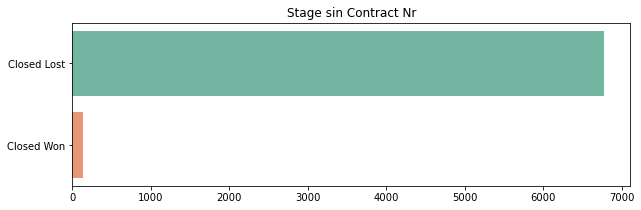

In [49]:
plt.figure(figsize = (10, 3))
plt.title('Stage sin Contract Nr')
sns.barplot(y= ['Closed Lost', 'Closed Won'], x = data.loc[mask_sales_contract_null,'Stage'].value_counts().head(2).values,palette='Set2' )

In [50]:
mask_sales_contract_1 = data['Sales_Contract_No'].notnull()
data.loc[mask_sales_contract_1,'Stage'].value_counts()

Closed Won     9395
Closed Lost     579
Name: Stage, dtype: int64

<AxesSubplot:title={'center':'Stage con Contract Nr'}>

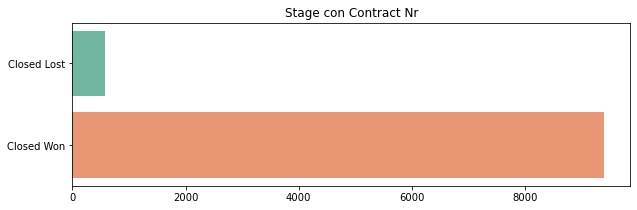

In [51]:
plt.figure(figsize = (10, 3))
plt.title('Stage con Contract Nr')
sns.barplot(y= ['Closed Lost', 'Closed Won'], x = data.loc[mask_sales_contract_1,'Stage'].value_counts().values[::-1], palette='Set2')

In [52]:
data.loc[mask_sales_contract_1,'Stage'].value_counts().values[::-1]

array([ 579, 9395], dtype=int64)

In [53]:
data.drop(inplace=True, axis=1,columns=['Sales_Contract_No'])

##### Luego de eliminar todas las columnas anteriores, nos quedan las siguientes columnas, dentro de las cuales aun debemos resolver algunos nulos:

In [54]:
data.columns

Index(['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Bureaucratic_Code',
       'Account_Created_Date', 'Source', 'Billing_Country', 'Opportunity_ID',
       'Account_Owner', 'Opportunity_Owner', 'Account_Type',
       'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Quote_Expiry_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'TRF', 'Total_Amount_Currency',
       'Total_Amount', 'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount',
       'Stage', 'ratio_currency'],
      dtype='object')

In [55]:
data.isna().mean().sort_values(ascending=False).head(10)

Source                              0.560394
Territory                           0.294978
Quote_Expiry_Date                   0.272910
ratio_currency                      0.207057
ASP_(converted)                     0.189355
Account_Type                        0.006609
Billing_Country                     0.001593
Pricing, Delivery_Terms_Approved    0.000000
Bureaucratic_Code_0_Approval        0.000000
Bureaucratic_Code_0_Approved        0.000000
dtype: float64

#### Tratamiento 'Territory'

In [56]:
Territory_Mask = ((data['Territory'].isna()) | (data['Territory'] == "None"))
data['Territory'] = np.where(Territory_Mask, data['Region'],data['Territory'])

In [57]:
data[['Region','Territory']].value_counts()

Region    Territory     
Japan     Japan             4892
EMEA      Germany           1682
Americas  NW America        1568
APAC      Australia         1208
          India              809
                            ... 
EMEA      Egypt                1
          Slovenia             1
          Czech Republic       1
          Croatia              1
APAC      Burma                1
Length: 84, dtype: int64

#### imputamos Billing_Country faltantes usando Territory y en el caso de ser de EMEA usaremos "Netherlands"

In [58]:
data.loc[data["Billing_Country"].isna(),["Territory","Billing_Country"]].head(5)

Territory Billing_Country
24        India             NaN
181     Tunisia             NaN
2613      India             NaN
3063      Japan             NaN
3071  Singapore             NaN

In [59]:
data.loc[data["Territory"]=="EMEA",["Territory","Billing_Country"]].value_counts().head(1)

Territory  Billing_Country
EMEA       Netherlands        55
dtype: int64

In [60]:
null_billing_country_mask = data["Billing_Country"].isna()
EMEA_Territory_mask = data["Territory"]=="EMEA"
data.loc[null_billing_country_mask & EMEA_Territory_mask,"Billing_Country"] = "Netherlands"
data.loc[null_billing_country_mask & ~EMEA_Territory_mask,"Billing_Country"] = data["Territory"]

In [61]:
data.isna().mean().sort_values(ascending=False).head(6)

Source                                0.560394
Quote_Expiry_Date                     0.272910
ratio_currency                        0.207057
ASP_(converted)                       0.189355
Account_Type                          0.006609
Pricing, Delivery_Terms_Quote_Appr    0.000000
dtype: float64

#### Tratamiento 'Source'

In [62]:
data['Source'].value_counts()

Source_7     2965
Source_9     1459
Source_11    1421
Source_13     786
Source_3      418
Source_1      137
Source_10     106
Source_2       86
Source_4       43
Source_6       19
Source_0        7
Source_12       2
Source_5        1
Name: Source, dtype: int64

In [63]:
data['Source'].isna().sum()

9497

In [64]:
mask_source_na = data['Source'].isnull()

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Amount', ylabel='Source'>

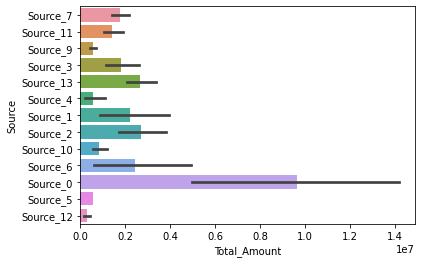

In [65]:
sns.barplot(data['Total_Amount'],data['Source'])

Optamos por poner 'Source' UNID a todos los nulos. 

In [66]:
data.loc[mask_source_na,"Source"] = "UNID"

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


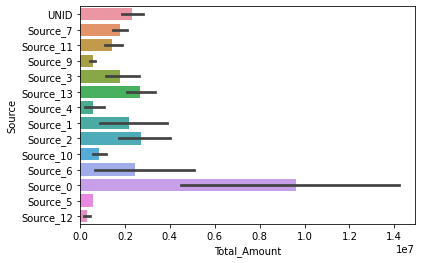

In [67]:
sns.barplot(data['Total_Amount'],data['Source']);

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


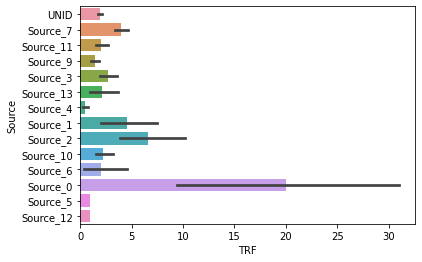

In [68]:
sns.barplot(data['TRF'],data['Source']);

In [69]:
data.columns

Index(['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Bureaucratic_Code',
       'Account_Created_Date', 'Source', 'Billing_Country', 'Opportunity_ID',
       'Account_Owner', 'Opportunity_Owner', 'Account_Type',
       'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Quote_Expiry_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'TRF', 'Total_Amount_Currency',
       'Total_Amount', 'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount',
       'Stage', 'ratio_currency'],
      dtype='object')

In [70]:
data.loc[mask_source_na,'Account_Owner'].value_counts().head()

Person_Name_50    3627
Person_Name_18     680
Person_Name_43     565
Person_Name_65     536
Person_Name_3      508
Name: Account_Owner, dtype: int64

In [71]:
data.loc[data['Account_Owner']=='Person_Name_50' ,'Source'].value_counts()

UNID         3627
Source_11     103
Name: Source, dtype: int64

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


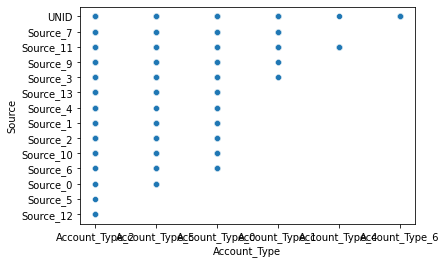

In [72]:
sns.scatterplot(data['Account_Type'],data['Source']);

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


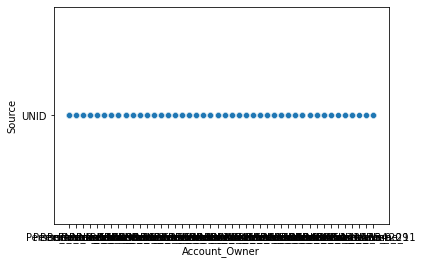

In [73]:
sns.scatterplot(data.loc[mask_source_na,'Account_Owner'],data.loc[mask_source_na,'Source']);

In [74]:
data.isna().mean().sort_values(ascending=False).head(6)

Quote_Expiry_Date    0.272910
ratio_currency       0.207057
ASP_(converted)      0.189355
Account_Type         0.006609
Quote_Type           0.000000
Opportunity_Owner    0.000000
dtype: float64

### Tratamiento ASP_(converted)

In [75]:
data.corr()["ASP_(converted)"].sort_values(ascending=False)

ASP_(converted)                       1.000000
Total_Taxable_Amount                  0.441941
Total_Amount                          0.064271
TRF                                  -0.000904
Pricing, Delivery_Terms_Quote_Appr   -0.003139
Bureaucratic_Code_0_Approved         -0.003593
Pricing, Delivery_Terms_Approved     -0.004733
Bureaucratic_Code_0_Approval         -0.010379
Opportunity_ID                       -0.033939
ratio_currency                       -0.034457
Delivery_Year                        -0.081704
Name: ASP_(converted), dtype: float64

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


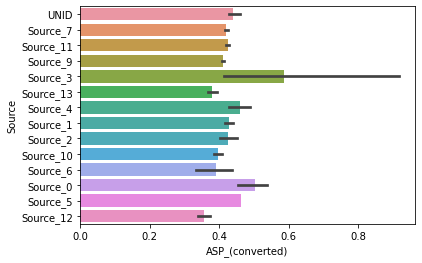

In [76]:
sns.barplot(data['ASP_(converted)'],data['Source']);

In [77]:
mask_asp_nulos = data['ASP_(converted)'].isnull()
data.loc[mask_asp_nulos,'Source'].value_counts()

UNID         2927
Source_7       98
Source_13      84
Source_11      31
Source_9       31
Source_1       12
Source_3       11
Source_4        8
Source_6        2
Source_2        2
Source_10       2
Source_0        1
Name: Source, dtype: int64

##### Casi todos los nulos de ASP pertenecen a la clase "UNID" y, como podemos ver en el grafico, la dispersion de valores de ASP para esa clase es baja, por lo que vamos a imputar los nulos de ASP por la media del "Source" al que corresponden.

In [78]:
asp_groupby_source = data.groupby(by='Source')['ASP_(converted)'].mean()

In [79]:
data.loc[mask_asp_nulos,'ASP_(converted)'] = data.loc[mask_asp_nulos,:].apply(lambda x:asp_groupby_source[x.Source],axis=1)

In [80]:
data.isna().mean().sort_values(ascending=False).head(5)

Quote_Expiry_Date    0.272910
ratio_currency       0.207057
Account_Type         0.006609
Delivery_Terms       0.000000
Opportunity_Type     0.000000
dtype: float64

#### Tratamiento Account_Type 

In [81]:
mask_null_account_type = data['Account_Type'].isnull()
data.loc[mask_null_account_type,"Account_Type"] = "UNID"

#### Tratamiento Quote_Expiry_Date

In [82]:
pd.Timestamp.fromordinal(750000)

Timestamp('2054-06-06 00:00:00')

In [83]:
data.loc[3,"Quote_Expiry_Date"]

nan

In [84]:
#convertimos aquellas quotes que no expiran a una fecha muy lejana
# data.loc[data.Quote_Expiry_Date.isnull(),["Quote_Expiry_Date"]] = pd.Timestamp('2054-06-06 00:00:00')
data.loc[data.Quote_Expiry_Date.isnull(),["Quote_Expiry_Date"]] = data.loc[data.Quote_Expiry_Date.isnull(),:].apply(lambda x: x.Opportunity_Created_Date,axis=1)

In [85]:
data.loc[3,"Quote_Expiry_Date"]

'12/8/2015'

In [86]:
data.isna().mean().sort_values(ascending=False).head(5)

ratio_currency       0.207057
Source               0.000000
Opportunity_Type     0.000000
Account_Type         0.000000
Opportunity_Owner    0.000000
dtype: float64

In [87]:
data.shape

(16947, 35)

#### Features de fechas se pasan a formato DateTime

In [88]:
# Nuevo listado de datetime
date = ['Quote_Expiry_Date','Opportunity_Created_Date','Account_Created_Date']
#date.remove('Delivery_Year')
date

['Quote_Expiry_Date', 'Opportunity_Created_Date', 'Account_Created_Date']

In [89]:
for i in range(len(date)):
    data[date[i]] = pd.to_datetime(data[date[i]], infer_datetime_format = True)

In [90]:
data['time_to_delivery'] = (data['Planned_Delivery_Start_Date'] - data['Opportunity_Created_Date'])
data['time_to_delivery'].head()

0   146 days
1    42 days
2    48 days
3   786 days
4   786 days
Name: time_to_delivery, dtype: timedelta64[ns]

In [91]:
data['delivery_timeframe'] = (data['Planned_Delivery_End_Date'] - data['Planned_Delivery_Start_Date'])
data['delivery_timeframe'].head()

0   60 days
1    2 days
2    0 days
3   58 days
4   27 days
Name: delivery_timeframe, dtype: timedelta64[ns]

In [92]:
data['opport_validity'] = (data['Quote_Expiry_Date'] - data['Opportunity_Created_Date'])
data['opport_validity'].head()

0    54 days
1    44 days
2   297 days
3     0 days
4   542 days
Name: opport_validity, dtype: timedelta64[ns]

In [93]:
data['account_seniority'] = (data['Opportunity_Created_Date'] - data['Account_Created_Date'] )
data['account_seniority'].head()

0   174 days
1   174 days
2   231 days
3   864 days
4   864 days
Name: account_seniority, dtype: timedelta64[ns]

#### TENDENCIA TARGET TEMPORAL (HACER PRIMERO STAGE BIN)
eliminanos datos anteriores a 2016 (~900 filas total) ya que no tenian una tendencia estable.

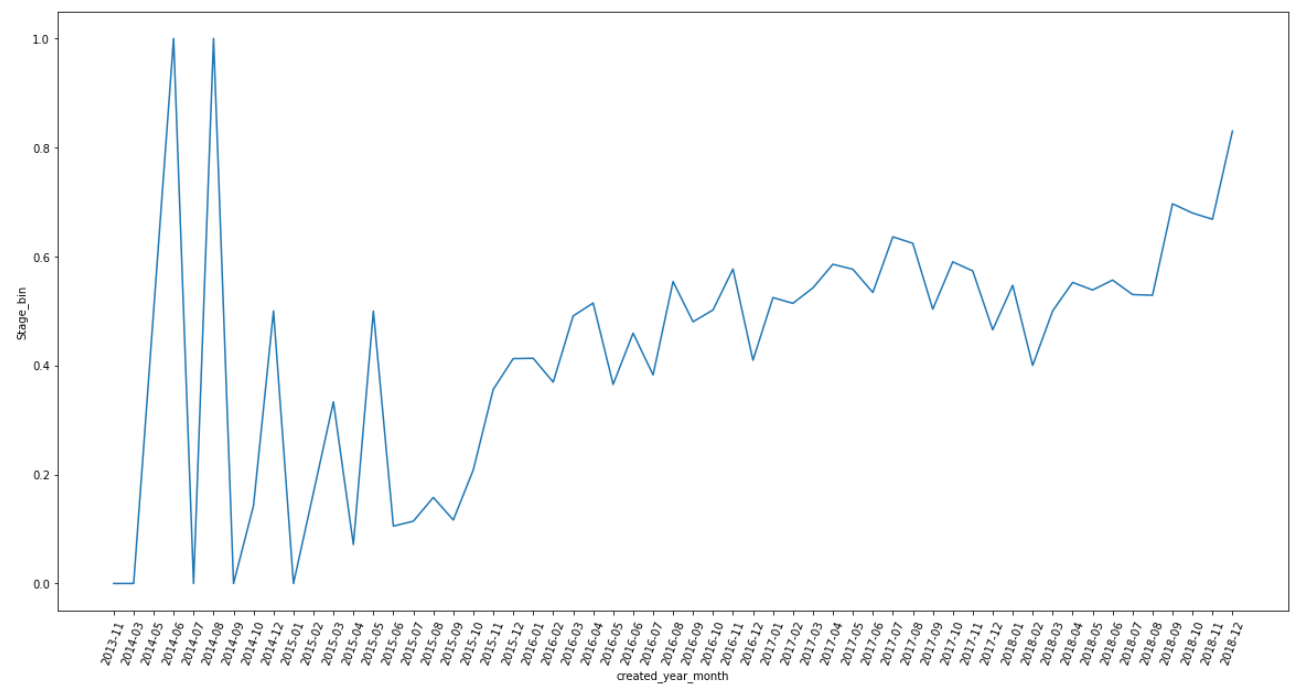


In [94]:
data = data.sort_values(by='Opportunity_Created_Date')

In [95]:
data['created_year_month'] = data.apply(lambda x: x['Opportunity_Created_Date'].strftime('%Y-%m'),axis=1)
data['created_year'] = data.apply(lambda x: x['Opportunity_Created_Date'].year,axis=1)

In [96]:
# filtramos los anteriores a 2016
mask_dsp_2016 = data['created_year']>=2016

In [97]:
data = data[mask_dsp_2016]

In [98]:
data.drop(columns=['created_year_month','created_year'],inplace=True)

In [99]:
# data = data.drop_duplicates(subset='Opportunity_ID')

In [100]:
# target_date_created = data[['created_year_month','Stage_bin']].groupby('created_year_month').mean()
# count_date_created = data[['created_year_month','Stage_bin']].groupby('created_year_month').count()

In [101]:
# count_date_created.Stage_bin

In [102]:
# plt.figure(figsize=(20,10))
# plt.xticks(rotation=70)
# sns.lineplot(x=target_date_created.index,y=target_date_created.Stage_bin)

#### Los convertimos a float para poder filtrar

In [103]:
data['account_seniority'] = data['account_seniority']/np.timedelta64(1, 'D')

In [104]:
data['opport_validity'] = data['opport_validity']/np.timedelta64(1, 'D')

In [105]:
data['time_to_delivery'] = data['time_to_delivery']/np.timedelta64(1, 'D')

In [106]:
data['delivery_timeframe'] = data['delivery_timeframe']/np.timedelta64(1, 'D')

In [107]:
validity_category = pd.cut(data.opport_validity,bins=[-10000,0,10,20,30,40,75,100,200,300,10000],labels=['UNID','10','20','30','40','75','100','200','300','>1_year'])

In [108]:
validity_category.value_counts(normalize=True)

UNID       0.317541
10         0.188121
30         0.104379
75         0.102429
20         0.087832
40         0.065559
200        0.065371
100        0.043664
300        0.017491
>1_year    0.007613
Name: opport_validity, dtype: float64

In [109]:
data['opport_validity'] = validity_category

#### Dropeamos las columnas con fechas que no aportan al modelo/ tienen posible data leakage y nos quedamos con las 2 columnas que creamos arriba

In [110]:
data.drop(columns=['Opportunity_Created_Date','Quote_Expiry_Date','Planned_Delivery_Start_Date',
 'Planned_Delivery_End_Date','Month','Account_Created_Date','Delivery_Year','Delivery_Quarter'],inplace=True)

In [111]:
data.loc[data['account_seniority']<0,'account_seniority']=0

In [112]:
data.loc[data['delivery_timeframe']<0,'delivery_timeframe']=0

In [113]:
# (data['opport_validity']<0).sum()

In [114]:
data.loc[data['time_to_delivery']<0,'time_to_delivery']=0

In [115]:
(data['time_to_delivery']<0).sum()

0

In [116]:
data.shape

(15894, 31)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15894 entries, 211 to 16101
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Region                              15894 non-null  object  
 1   Territory                           15894 non-null  object  
 2   Pricing, Delivery_Terms_Quote_Appr  15894 non-null  int64   
 3   Pricing, Delivery_Terms_Approved    15894 non-null  int64   
 4   Bureaucratic_Code_0_Approval        15894 non-null  int64   
 5   Bureaucratic_Code_0_Approved        15894 non-null  int64   
 6   Bureaucratic_Code                   15894 non-null  object  
 7   Source                              15894 non-null  object  
 8   Billing_Country                     15894 non-null  object  
 9   Opportunity_ID                      15894 non-null  int64   
 10  Account_Owner                       15894 non-null  object  
 11  Opportunity_Owner         

#### Binarización del Target

Para un modelo, es importante a su vez que la **variable target** esté bien distribuida, es decir, que haya suficientes casos de todos los posibles outcomes. Vemos la cantidad de valores en la columna para "Closed Won" y "Closed Lost". 

In [118]:
# Closed Won y Closed Lost estan balanceadas. 
data['Stage'].value_counts(normalize = True)

Closed Won       0.581351
Closed Lost      0.414622
Proposal         0.002202
Negotiation      0.001133
Qualification    0.000692
Name: Stage, dtype: float64

Podemos observar que los valores de Closed Won y Closed Lost se encuentran balanceados. Para hacer el modelo más eficiente, vamos a reemplazar las otras 3 categorías y considerarlas "Closed Lost". 

In [119]:
Stage_Mask = (data['Stage'] == "Closed Won") | (data['Stage'] == "Closed Lost") 
data = data[Stage_Mask]

In [120]:
#Binarizando el target
# 'Closed Won' = 1 
# 'Clodes Lost' = 0

data['Stage_bin'] = data['Stage'].apply(lambda x: 1 if x == 'Closed Won' else 0)

data['Stage_bin'].value_counts(normalize = True)


1    0.583702
0    0.416298
Name: Stage_bin, dtype: float64

In [121]:
data.drop(inplace=True, axis=1,columns=["Stage"])

In [122]:
data.shape

(15830, 31)

In [123]:
data.columns

Index(['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Bureaucratic_Code', 'Source',
       'Billing_Country', 'Opportunity_ID', 'Account_Owner',
       'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type',
       'Delivery_Terms', 'Last_Modified_By', 'Product_Family', 'Product_Name',
       'ASP_(converted)', 'TRF', 'Total_Amount_Currency', 'Total_Amount',
       'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount',
       'ratio_currency', 'time_to_delivery', 'delivery_timeframe',
       'opport_validity', 'account_seniority', 'Stage_bin'],
      dtype='object')

In [124]:
data["TRF"].value_counts()

0      11327
1       2041
2        569
3        319
5        272
       ...  
51         1
250        1
122        1
98         1
163        1
Name: TRF, Length: 95, dtype: int64

#### Hacemos groupby y transform con suma de las features numericas

In [125]:
data["TRF"]=data[["Opportunity_ID",'TRF']].groupby("Opportunity_ID").transform("sum")

In [126]:
data["TRF"].value_counts()

0      10759
1       1648
2        674
3        409
5        312
       ...  
429        1
98         1
75         1
81         1
167        1
Name: TRF, Length: 108, dtype: int64

In [127]:
numericas = [i for i in numericas if i in data.columns]
numericas

['ASP_(converted)', 'TRF', 'Total_Amount', 'Total_Taxable_Amount']

In [128]:
data['ASP_(converted)']=data[["Opportunity_ID",'ASP_(converted)']].groupby("Opportunity_ID").transform("mean")

In [129]:
tasas = tasas.set_index('Total_Taxable_Amount_Currency')

In [130]:
tasas.loc['JPY','ratio_currency']

0.009746583210700792

In [131]:
data['total_amount_converted_currency'] = data.apply(lambda x: tasas.loc[x.Total_Taxable_Amount_Currency]*x.Total_Amount,axis=1)

In [132]:
data['total_amount_converted_currency'] = data['total_amount_converted_currency'].astype('float')

In [133]:
pd.options.display.float_format = "{:.2f}".format
data.loc[data['total_amount_converted_currency'].isna(),["Total_Taxable_Amount_Currency","Total_Amount","total_amount_converted_currency"]]

Empty DataFrame
Columns: [Total_Taxable_Amount_Currency, Total_Amount, total_amount_converted_currency]
Index: []

In [134]:
data[["Total_Taxable_Amount_Currency","Total_Amount","total_amount_converted_currency"]]

Total_Taxable_Amount_Currency  Total_Amount  \
211                             JPY     645840.00   
212                             EUR     256848.75   
210                             JPY     897000.00   
265                             JPY     140000.00   
264                             JPY       6200.00   
...                             ...           ...   
16099                           JPY    1071840.00   
16100                           USD     309441.60   
16102                           USD       5752.50   
16103                           USD      15206.40   
16101                           USD       1198.53   

       total_amount_converted_currency  
211                            6294.73  
212                          290410.90  
210                            8742.69  
265                            1364.52  
264                              60.43  
...                                ...  
16099                         10446.78  
16100                        309441.60  
16102                          5752.50  
16103                         15206.40  
16101                          1198.53  

[15830 rows x 3 columns]

In [135]:
data = data.drop(columns=['Total_Taxable_Amount','Total_Amount','Total_Taxable_Amount_Currency', 'Total_Amount_Currency'])

In [136]:
data['total_amount_converted_currency']=data[["Opportunity_ID",'total_amount_converted_currency']].groupby("Opportunity_ID").transform("sum")

In [137]:
data.isna().mean().sort_values(ascending=False).head(5)

ratio_currency                       0.20
total_amount_converted_currency      0.00
Account_Type                         0.00
Territory                            0.00
Pricing, Delivery_Terms_Quote_Appr   0.00
dtype: float64

In [138]:
#dropeo ratio_currency

data = data.drop(columns=['ratio_currency'])


In [139]:
data.isna().mean().sort_values(ascending=False).head(5)

total_amount_converted_currency      0.00
Account_Type                         0.00
Territory                            0.00
Pricing, Delivery_Terms_Quote_Appr   0.00
Pricing, Delivery_Terms_Approved     0.00
dtype: float64

In [140]:
data.shape

(15830, 27)

In [141]:
data.columns

Index(['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Bureaucratic_Code', 'Source',
       'Billing_Country', 'Opportunity_ID', 'Account_Owner',
       'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type',
       'Delivery_Terms', 'Last_Modified_By', 'Product_Family', 'Product_Name',
       'ASP_(converted)', 'TRF', 'time_to_delivery', 'delivery_timeframe',
       'opport_validity', 'account_seniority', 'Stage_bin',
       'total_amount_converted_currency'],
      dtype='object')

In [142]:
# a = data[['Stage_bin','Last_Modified_By']].groupby('Last_Modified_By').mean().rename(columns={'Stage_bin':'% target'})
# b = data[['Stage_bin','Last_Modified_By']].groupby('Last_Modified_By').count().rename(columns={'Stage_bin':'count'})
# pd.concat([a, b], axis=1, join="inner").sort_values(by='count',ascending=False).head()

In [143]:
data.drop(columns='Last_Modified_By',inplace=True)

In [144]:
# Graficamos las cantidad de Opportunity_ID por Región antes de ajustar los duplicados

data2= data.drop_duplicates(subset='Opportunity_ID')


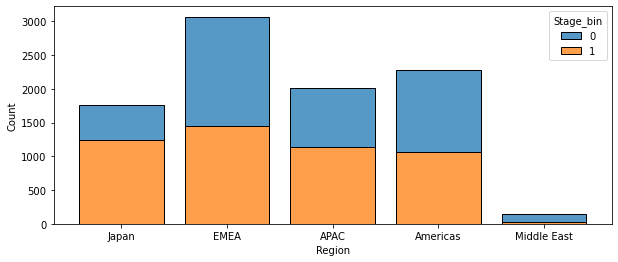

In [145]:
plt.figure(figsize=(10,4))
ax = sns.histplot(data=data2,x="Region", hue="Stage_bin",multiple="stack",shrink=0.8)

<AxesSubplot:title={'center':'Top 10 Billing Country x Oportunidades'}>

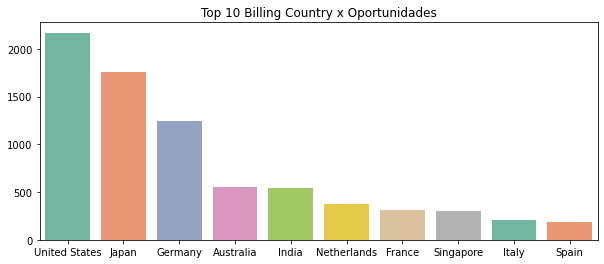

In [146]:
plt.figure(figsize = (10, 4))
plt.title('Top 10 Billing Country x Oportunidades')
sns.barplot(y= data2['Billing_Country'].value_counts().head(10).values, x = data2['Billing_Country'].value_counts().head(10).index, palette='Set2')

### Sección 3 <a class="anchor" id="4-bullet"></a>
- OneHotEncoder de variables categoricas
- Train-test Split y aplicación StandardScaler

### Convertimos las variables categóricas con One Hot Encoder

In [147]:
categoricas = ['Region','Territory', 'Bureaucratic_Code', 'Source', 'Billing_Country', 'Account_Name',
              'Opportunity_Name', 'Account_Owner', 'Opportunity_Owner', 'Account_Type', 'Opportunity_Type',
              'Quote_Type', 'Delivery_Terms', 'Brand', 'Product_Type', 'Size', 'Product_Category_B', 
              'Last_Modified_By', 'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP_(converted)_Currency', 
              'Delivery_Quarter', 'Total_Amount_Currency', 'Total_Taxable_Amount_Currency', 'Prod_Category_A','opport_validity']

numericas = ['ID', 'Sales_Contract_No', 'Price', 'ASP', 'ASP_(converted)', 'TRF', 'Total_Amount', 
            'Total_Taxable_Amount','account_seniority','time_to_delivery','delivery_timeframe','total_amount_converted_currency']

# categoricas=['Product_Name', 'opport_validity', 'Opportunity_Type', 'Billing_Country', 'Account_Type']
# num_cat = numericas+categoricas
# num_cat.append("Opportunity_ID")

In [148]:
# Nuevo listado de categóricas post dropeo

categoricas = [i for i in categoricas if i in data.columns]
numericas = [i for i in numericas if i in data.columns]

# para el one hot uso solo las categóricas que me quedaron post proceso anterior

# categoricas2 = list(feature_importance[0].nlargest(n=8).index)

print(categoricas)
# print(categoricas2)

['Region', 'Territory', 'Bureaucratic_Code', 'Source', 'Billing_Country', 'Account_Owner', 'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms', 'Product_Family', 'Product_Name', 'opport_validity']


In [149]:
data = data.reset_index(drop=True)

In [150]:
# x,y -> scaler -> gridsearch

In [151]:
# X= data.drop(columns=[i for i in data.columns if i not in num_cat], errors='ignore')
X= data.drop(columns=["Stage_bin"])
y= data['Stage_bin']

In [152]:
X.columns

Index(['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Bureaucratic_Code', 'Source',
       'Billing_Country', 'Opportunity_ID', 'Account_Owner',
       'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type',
       'Delivery_Terms', 'Product_Family', 'Product_Name', 'ASP_(converted)',
       'TRF', 'time_to_delivery', 'delivery_timeframe', 'opport_validity',
       'account_seniority', 'total_amount_converted_currency'],
      dtype='object')

In [153]:
X.shape

(15830, 25)

In [154]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

dummies = pd.DataFrame(encoder.fit_transform(X.loc[:,categoricas]))
dummies_cols = []
    
for i,g in enumerate(encoder.categories_):
        
    for lista in g[:]:
        dummies_cols.append(categoricas[i]+'_'+lista)
        

dummies.columns = dummies_cols
    
X = X.join(dummies)
X = X.drop(columns=categoricas)

In [155]:
X.shape

(15830, 988)

In [156]:
X.isnull().sum()

Pricing, Delivery_Terms_Quote_Appr    0
Pricing, Delivery_Terms_Approved      0
Bureaucratic_Code_0_Approval          0
Bureaucratic_Code_0_Approved          0
Opportunity_ID                        0
                                     ..
opport_validity_300                   0
opport_validity_40                    0
opport_validity_75                    0
opport_validity_>1_year               0
opport_validity_UNID                  0
Length: 988, dtype: int64

In [157]:
product_family_cols = [col for col in X.columns if 'Product_Family' in col]
product_name_cols = [col for col in X.columns if 'Product_Name' in col]

In [158]:
for col in product_family_cols:
    X[col]=X[["Opportunity_ID",col]].groupby("Opportunity_ID").transform("sum")

In [159]:
for col in product_name_cols:
    X[col]=X[["Opportunity_ID",col]].groupby("Opportunity_ID").transform("sum")

Droppeamos filas duplicadas con el mismo Opportunity_ID

In [160]:
X = X.drop_duplicates(subset='Opportunity_ID')

In [161]:
X['Opportunity_ID'].unique().shape

(9256,)

In [162]:
y = pd.DataFrame(y)

In [163]:
y = y.loc[X.index]

In [164]:
X.shape

(9256, 988)

In [165]:
y.shape

(9256, 1)

In [166]:
#Transformo y_df a una serie
y = y.squeeze()
y.shape

(9256,)

In [167]:
y.value_counts(normalize=True)

1   0.53
0   0.47
Name: Stage_bin, dtype: float64

## Eliminación de Outliers

In [168]:
numericas

['ASP_(converted)',
 'TRF',
 'account_seniority',
 'time_to_delivery',
 'delivery_timeframe',
 'total_amount_converted_currency']

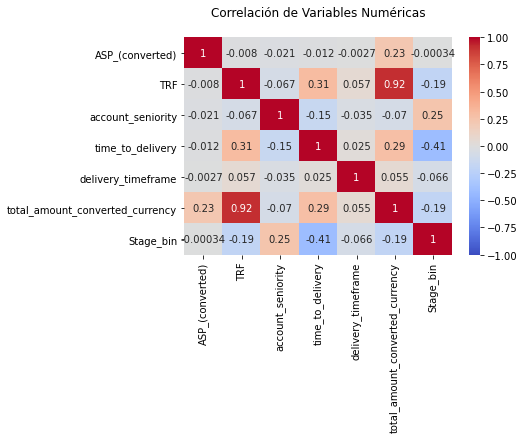

In [169]:
print('\n')
plt.title('Correlación de Variables Numéricas\n')
sns.heatmap(data2[['ASP_(converted)', 'TRF', 'account_seniority', 'time_to_delivery', 'delivery_timeframe', 'total_amount_converted_currency',
 'Stage_bin']].corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True);

In [170]:
X.drop(columns='TRF',inplace=True)

In [171]:
def remove_outlier_IQR(dataset,col):
    df=dataset
    orig_rows = df.shape[0]
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    col_final = df[~((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR)))]
    fin_rows = col_final.shape[0]
    print("","Filas:",
          orig_rows,"\n",
          "Filas droppeadas:",
          orig_rows-fin_rows,"\n",
          "Filas Finales:",fin_rows)
    return col_final

In [172]:
bin_range=np.arange(-1,3000000,300000).tolist()
    
bins_amount_converted = pd.cut(X.total_amount_converted_currency,bins=bin_range).to_frame().value_counts().reset_index().sort_values(by="total_amount_converted_currency")


In [173]:
X['ASP_(converted)']

0       0.62
1       0.58
2       0.62
3       0.48
8       0.60
        ... 
15822   0.40
15824   0.27
15825   0.38
15826   0.38
15827   0.43
Name: ASP_(converted), Length: 9256, dtype: float64

(0.0, 1.0)

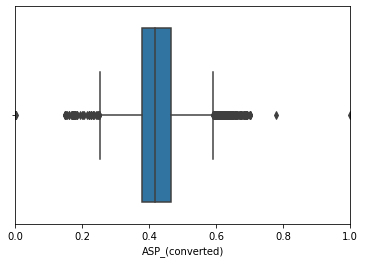

In [174]:
ax = sns.boxplot(data=X, x=X['ASP_(converted)'])
plt.xlim(0,1)

(0.0, 1500000.0)

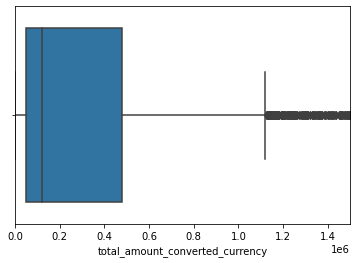

In [175]:
ax = sns.boxplot(data=X, x=X["total_amount_converted_currency"])
plt.xlim(0,1500000)

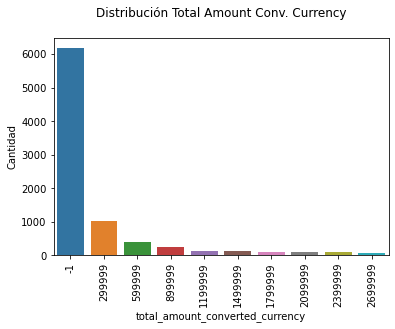

In [176]:
fig,ax = plt.subplots()
plt.title('Distribución Total Amount Conv. Currency\n')
plt.xticks(rotation=90)
sns.barplot(x=bins_amount_converted['total_amount_converted_currency'],y=bins_amount_converted[0])
plt.ylabel('Cantidad')
ax.set_xticklabels(bin_range[:10]);

In [177]:
X=remove_outlier_IQR(X,"total_amount_converted_currency")

 Filas: 9256 
 Filas droppeadas: 1459 
 Filas Finales: 7797


<AxesSubplot:title={'center':'Distribución ASP_(Converted)\n'}, xlabel='ASP_(Converted)', ylabel='Cantidad'>

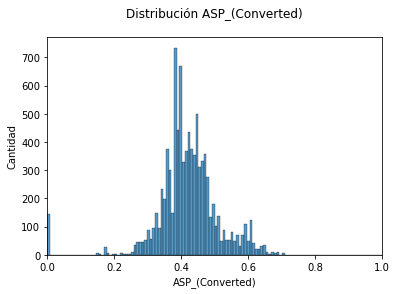

In [178]:
plt.xlim(0,1)
plt.title('Distribución ASP_(Converted)\n')
plt.ylabel('Cantidad')
plt.xlabel('ASP_(Converted)');
sns.histplot(data2['ASP_(converted)'])

In [179]:
X=remove_outlier_IQR(X,'ASP_(converted)')

 Filas: 7797 
 Filas droppeadas: 566 
 Filas Finales: 7231


In [180]:
y = y.loc[X.index]

#### Preprocesamiento (train_test_split y Standarizado)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.20, random_state = 0)

In [182]:
# Verificamos que coincidan las proporciones del target
y_train.mean(), y_test.mean()

(0.6087482710926694, 0.6019350380096752)

In [183]:
y_test.value_counts()

1    871
0    576
Name: Stage_bin, dtype: int64

In [184]:
print(X_train.shape)
print(X_test.shape)

(5784, 987)
(1447, 987)


In [185]:
X_train_opid = X_train["Opportunity_ID"]
X_test_opid = X_test["Opportunity_ID"]
X_train.drop(columns="Opportunity_ID",inplace=True)
X_test.drop(columns="Opportunity_ID",inplace=True)
X.drop(columns="Opportunity_ID",inplace=True)

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [186]:
# Nuevo listado de numéricas

numericas = [i for i in numericas if i in X.columns]
numericas

['ASP_(converted)',
 'account_seniority',
 'time_to_delivery',
 'delivery_timeframe',
 'total_amount_converted_currency']

In [187]:
categoricas = [i for i in X.columns if i not in numericas]
len(categoricas)

981

In [188]:
print('Composición del training set:')
print(y_train.value_counts(),'\n')

Composición del training set:
1    3521
0    2263
Name: Stage_bin, dtype: int64 



In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train,y_train=oversampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train.value_counts(),'\n')

print('\nComposición del test set:')
print(y_test.value_counts());

In [ ]:
#estandarizamos numéricas. 
# Acá tengo dudas, porque entiendo que hay que aplicar Fit-Transform en train, sólo transform en Test. 
# sólo se pueden escalar las numéricas, no las categóricas. 
# los dates que pasamos a interger se deberían escalar??? 

# scaler = StandardScaler()
# X_train_std = scaler.fit_transform(X_train[numericas])
# X_test_std = scaler.transform(X_test[numericas])
# X_train.loc[:,numericas] = X_train_std
# X_test.loc[:,numericas] = X_test_std

In [ ]:
# creamos los conjuntos de train y test que van a entrar en los modelos
# reempolazo los valores de las variables numericas en train y test con los valores escalados 
# esto tira un warning que no entendí como resolver

# X_train.loc[:,numericas] = X_train_std
# X_test.loc[:,numericas] = X_test_std

## Modelos <a class="anchor" id="5-bullet"></a>

### Pipeline modelo knn

In [183]:
cv = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [185]:
pasos_knn = [('preprocesamiento', MinMaxScaler()), 
             ('knn', KNeighborsClassifier())]

pipe_knn=Pipeline(pasos_knn)

In [189]:
param_grid_knn = [{'preprocesamiento':[StandardScaler(), MinMaxScaler()],
               'knn__n_neighbors': [10,20,30], 
                'knn__weights': ['distance'], 
                'knn__p': [1]}] 



In [190]:
grid_knn =GridSearchCV(pipe_knn, param_grid_knn, cv=cv, n_jobs=-1, scoring="neg_log_loss")

grid_knn.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'knn__n_neighbors': [10, 20, 30], 'knn__p': [1],
                          'knn__weights': ['distance'],
                          'preprocesamiento': [StandardScaler(),
                                               MinMaxScaler()]}],
             scoring='neg_log_loss')

In [169]:
grid_knn.best_score_

-0.45946368511923097

In [170]:
best_knn = grid_knn.best_estimator_
best_knn

Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=50, p=1,
                                      weights='distance'))])

In [171]:
X_train_pred_best_knn = best_knn.predict(X_train)
X_train_pred_proba_best_knn = best_knn.predict_proba(X_train)

In [173]:
X_test_pred_best_knn = best_knn.predict(X_test)
X_test_pred_proba_best_knn = best_knn.predict_proba(X_test)

In [174]:
print("Tuned Hyperparameters :", best_knn)
print("Log-Loss en CV:", grid_knn.best_score_*-1)


Tuned Hyperparameters : Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=50, p=1,
                                      weights='distance'))])
Log-Loss en CV: 0.45946368511923097


Accuracy en train: 0.9997298757428417
Log-Loss en train: 0.0003744717345012392


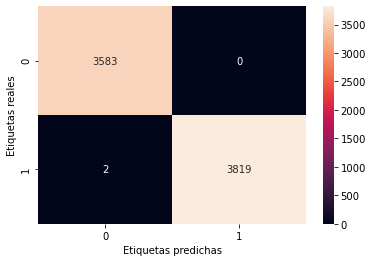

In [175]:
# Graficamos la matriz de confusión en train 
print("Accuracy en train:",accuracy_score(y_train, X_train_pred_best_knn))
print("Log-Loss en train:",log_loss(y_train, X_train_pred_proba_best_knn))


sns.heatmap(confusion_matrix(y_train, X_train_pred_best_knn), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');



Accuracy en test: 0.7019438444924406
Log-Loss en test: 0.6039577277823713


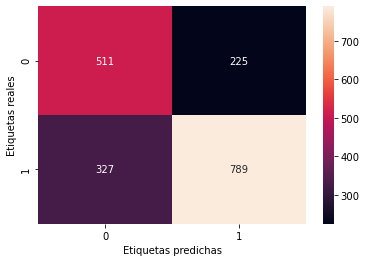

In [176]:
# Graficamos la matriz de confusión en test
print("Accuracy en test:",accuracy_score(y_test, X_test_pred_best_knn))
print("Log-Loss en test:",log_loss(y_test, X_test_pred_proba_best_knn))


sns.heatmap(confusion_matrix(y_test, X_test_pred_best_knn), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');


### Pipeline Modelo Logistic Regression

In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
pasos_log_reg = [('preprocesamiento', MinMaxScaler()), 
             ('log_reg', LogisticRegression(random_state=1))]

pipe_log_reg =Pipeline(pasos_log_reg)

In [205]:
param_grid_log_reg = [{'preprocesamiento':[StandardScaler(), MinMaxScaler()],
                   'log_reg__penalty': ['l2'], 
                    'log_reg__C': [1, 10, 100], 
                    'log_reg__solver': ['saga']}] 


In [206]:
grid_log_reg =GridSearchCV(pipe_log_reg, param_grid_log_reg, cv=cv, n_jobs=-1, scoring="neg_log_loss")

grid_log_reg.fit(X_train,y_train)

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                                       ('log_reg',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'log_reg__C': [1, 10, 100],
                          'log_reg__penalty': ['l2'],
                          'log_reg__solver': ['saga'],
                          'preprocesamiento': [StandardScaler(),
                                               MinMaxScaler()]}],
             scoring='neg_log_loss')

In [207]:
best_log_reg = grid_log_reg.best_estimator_
best_log_reg

Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                ('log_reg',
                 LogisticRegression(C=1, random_state=1, solver='saga'))])

In [208]:
X_train_pred_best_log_reg = best_log_reg.predict(X_train)
X_train_pred_proba_best_log_reg = best_log_reg.predict_proba(X_train)


In [209]:
X_test_pred_best_log_reg = best_log_reg.predict(X_test)
X_test_pred_proba_best_log_reg = best_log_reg.predict_proba(X_test)

In [210]:
print("Tuned Hyperparameters :", best_log_reg)
print("Log-Loss en CV:", grid_log_reg.best_score_*-1)


Tuned Hyperparameters : Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                ('log_reg',
                 LogisticRegression(C=1, random_state=1, solver='saga'))])
Log-Loss en CV: 0.44054928040914954


Accuracy en train: 0.8290113452188006
Log-Loss en train: 0.38933796558635286


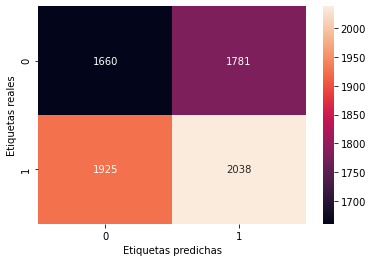

In [211]:
# Graficamos la matriz de confusión en train 
print("Accuracy en train:",accuracy_score(y_train, X_train_pred_best_log_reg))
print("Log-Loss en train:",log_loss(y_train, X_train_pred_proba_best_log_reg))


sns.heatmap(confusion_matrix(y_train, X_train_pred_best_knn), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');


Accuracy en test: 0.8147948164146869
Log-Loss en test: 0.4396372445573791


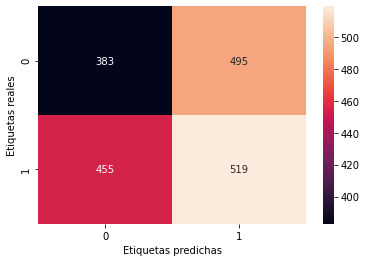

In [212]:
# Graficamos la matriz de confusión en test
print("Accuracy en test:",accuracy_score(y_test, X_test_pred_best_log_reg))
print("Log-Loss en test:",log_loss(y_test, X_test_pred_proba_best_log_reg))

sns.heatmap(confusion_matrix(y_test, X_test_pred_best_knn), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

### Pipeline Modelo Random Forest

In [435]:
cv = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [436]:
pasos_rf = [('preprocesamiento', MinMaxScaler()), 
             ('rf', RandomForestClassifier(random_state=1))]

pipe_rf =Pipeline(pasos_rf)

In [437]:
param_grid_rf = [{'preprocesamiento':[StandardScaler(), MinMaxScaler()],
                       'rf__n_estimators': [200], 
                        'rf__max_depth': [25], 
                        'rf__criterion': ['gini'],
                 'rf__max_features': ['auto']}] 


In [438]:
grid_rf =GridSearchCV(pipe_rf, param_grid_rf, cv=cv, n_jobs=-1, scoring="neg_log_loss")

grid_rf.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'preprocesamiento': [StandardScaler(),
                                               MinMaxScaler()],
                          'rf__criterion': ['gini'], 'rf__max_depth': [25],
                          'rf__max_features': ['auto'],
                          'rf__n_estimators': [200]}],
             scoring='neg_log_loss')

In [439]:
best_random = grid_rf.best_estimator_
best_random

Pipeline(steps=[('preprocesamiento', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=25, n_estimators=200,
                                        random_state=1))])

In [440]:
X_train_pred_best_rf = best_random.predict(X_train)
X_train_pred_proba_best_rf = best_random.predict_proba(X_train)


In [441]:
X_test_pred_best_rf = best_random.predict(X_test)
X_test_pred_proba_best_rf = best_random.predict_proba(X_test)

In [442]:
print("Tuned Hyperparameters :", best_random)
print("Log-Loss en CV:", grid_rf.best_score_*-1)

Tuned Hyperparameters : Pipeline(steps=[('preprocesamiento', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=25, n_estimators=200,
                                        random_state=1))])
Log-Loss en CV: 0.35137932982851916


Accuracy en train: 0.9867935245668844
Log-Loss en train: 0.1886512745758225


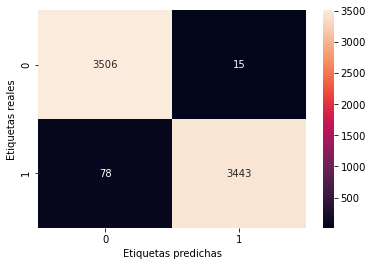

In [443]:
# Graficamos la matriz de confusión en train 
print("Accuracy en train:",accuracy_score(y_train, X_train_pred_best_rf))
print("Log-Loss en train:",log_loss(y_train, X_train_pred_proba_best_rf))


sns.heatmap(confusion_matrix(y_train, X_train_pred_best_rf), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');


Accuracy en test: 0.8099516240497581
Log-Loss en test: 0.4111900998600909


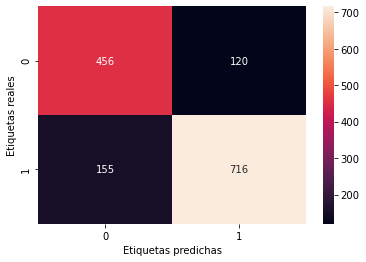

In [444]:
# Graficamos la matriz de confusión en test
print("Accuracy en test:",accuracy_score(y_test, X_test_pred_best_rf))
print("Log-Loss en test:",log_loss(y_test, X_test_pred_proba_best_rf))

sns.heatmap(confusion_matrix(y_test, X_test_pred_best_rf), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

### LightGradientBoostingMachine

In [244]:
import lightgbm as lgbm

In [249]:
pasos_lgbm = [('preprocesamiento', MinMaxScaler()), 
             ('lgbm', lgbm.LGBMClassifier(random_state=42))]

pipe_lgbm =Pipeline(pasos_lgbm)

In [255]:
param_grid_lgbm = [{'preprocesamiento':[StandardScaler(), MinMaxScaler()],
                'lgbm__learning_rate': [0.005,0.01],
                'lgbm__lgmb__n_estimators': [1000],
                'lgbm__boosting_type' : ['gbdt', 'dart'],
                'lgbm__reg_alpha' : [1,1.2],
                'lgbm__reg_lambda' : [1,1.4],
                'lgbm__num_leaves': [6,12,16]}]


In [256]:
# ### agrego esto porque sino falla el LGBM
import re
X_train_lgbm = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test_lgbm = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [257]:
grid_lgbm =GridSearchCV(pipe_lgbm, param_grid_lgbm, cv=cv, n_jobs=-1, scoring="neg_log_loss")

grid_lgbm.fit(X_train_lgbm,y_train)

[LightGBM] [Warning] Unknown parameter: lgmb__n_estimators


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                                       ('lgbm',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'lgbm__boosting_type': ['gbdt', 'dart'],
                          'lgbm__learning_rate': [0.005, 0.01],
                          'lgbm__lgmb__n_estimators': [500, 1000],
                          'lgbm__num_leaves': [6, 12, 16],
                          'lgbm__reg_alpha': [1, 1.2],
                          'lgbm__reg_lambda': [1, 1.4],
                          'preprocesamiento': [StandardScaler(),
                                               MinMaxScaler()]}],
             scoring='neg_log_loss')

In [258]:
lgbm_best = grid_lgbm.best_estimator_
lgbm_best

Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                ('lgbm',
                 LGBMClassifier(learning_rate=0.01, lgmb__n_estimators=500,
                                num_leaves=16, random_state=42, reg_alpha=1,
                                reg_lambda=1))])

In [259]:
X_train_pred_best_lgbm = lgbm_best.predict(X_train_lgbm)
X_train_pred_proba_best_lgbm = lgbm_best.predict_proba(X_train_lgbm)

In [260]:
X_test_pred_best_lgbm = lgbm_best.predict(X_test_lgbm)
X_test_pred_proba_best_lgbm = lgbm_best.predict_proba(X_test_lgbm)

In [261]:
print("Tuned Hyperparameters :", lgbm_best)
print("Log-Loss en CV:", grid_lgbm.best_score_*-1)

Tuned Hyperparameters : Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                ('lgbm',
                 LGBMClassifier(learning_rate=0.01, lgmb__n_estimators=500,
                                num_leaves=16, random_state=42, reg_alpha=1,
                                reg_lambda=1))])
Log-Loss en CV: 0.4985437881360215


Accuracy en train: 0.8103727714748784
Log-Loss en train: 0.48809888497357334


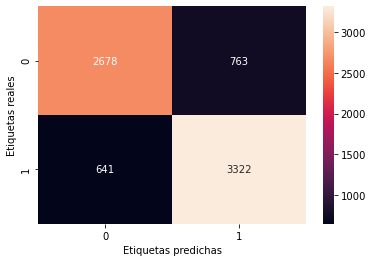

In [263]:
# Graficamos la matriz de confusión en train 
print("Accuracy en train:",accuracy_score(y_train, X_train_pred_best_lgbm))
print("Log-Loss en train:",log_loss(y_train, X_train_pred_proba_best_lgbm))


sns.heatmap(confusion_matrix(y_train, X_train_pred_best_lgbm), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');


Accuracy en test: 0.8029157667386609
Log-Loss en test: 0.4950168055329758


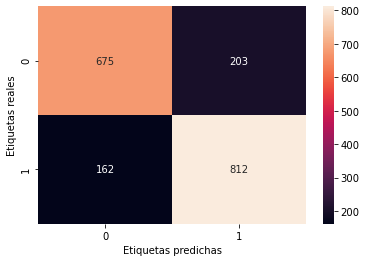

In [264]:
# Graficamos la matriz de confusión en test
print("Accuracy en test:",accuracy_score(y_test, X_test_pred_best_lgbm))
print("Log-Loss en test:",log_loss(y_test, X_test_pred_proba_best_lgbm))


sns.heatmap(confusion_matrix(y_test, X_test_pred_best_lgbm), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

### Pipeline Modelo Gradient Boosting

In [445]:
pasos_gb = [('preprocesamiento', MinMaxScaler()), 
             ('gb', GradientBoostingClassifier())]

pipe_gb =Pipeline(pasos_gb)

In [446]:
param_grid_gb = [{'preprocesamiento':[StandardScaler()],
                       'gb__n_estimators': [1000], 
                        'gb__learning_rate': [0.1], 
                        'gb__max_depth': [8],
                        'gb__min_samples_leaf': [2],
                        'gb__subsample': [0.8],
                        'gb__max_features': ["sqrt"]}] 


In [447]:
grid_gb =GridSearchCV(pipe_gb, param_grid_gb, cv=cv, n_jobs=-1, scoring="neg_log_loss")



In [448]:
grid_gb.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                                       ('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid=[{'gb__learning_rate': [0.1], 'gb__max_depth': [8],
                          'gb__max_features': ['sqrt'],
                          'gb__min_samples_leaf': [2],
                          'gb__n_estimators': [1000], 'gb__subsample': [0.8],
                          'preprocesamiento': [StandardScaler()]}],
             scoring='neg_log_loss')

In [449]:
gb_best = grid_gb.best_estimator_
gb_best

Pipeline(steps=[('preprocesamiento', StandardScaler()),
                ('gb',
                 GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                                            min_samples_leaf=2,
                                            n_estimators=1000,
                                            subsample=0.8))])

In [450]:
X_train_pred_best_gb = gb_best.predict(X_train)
X_train_pred_proba_best_gb = gb_best.predict_proba(X_train)

In [451]:
X_test_pred_best_gb = gb_best.predict(X_test)
X_test_pred_proba_best_gb = gb_best.predict_proba(X_test)

In [452]:
print("Tuned Hyperparameters :", gb_best)
print("Log-Loss en CV:", grid_gb.best_score_*-1)

# Tuned Hyperparameters : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}
# Accuracy en train: 0.9620046302601116
# Accuracy en CV: 0.8350801208629569

Tuned Hyperparameters : Pipeline(steps=[('preprocesamiento', StandardScaler()),
                ('gb',
                 GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                                            min_samples_leaf=2,
                                            n_estimators=1000,
                                            subsample=0.8))])
Log-Loss en CV: 0.3326813333073561


Accuracy en train: 0.9944618006248225
Log-Loss en train: 0.0675654461789547


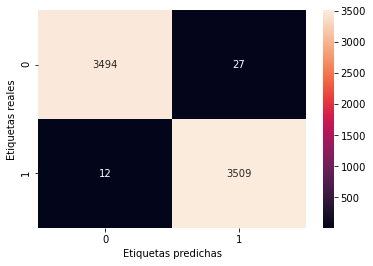

In [453]:
# Graficamos la matriz de confusión en train 
print("Accuracy en train:",accuracy_score(y_train, X_train_pred_best_gb))
print("Log-Loss en train:",log_loss(y_train, X_train_pred_proba_best_gb))


sns.heatmap(confusion_matrix(y_train, X_train_pred_best_gb), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');


Accuracy en test: 0.8092605390463027
Log-Loss en test: 0.4751359579148274


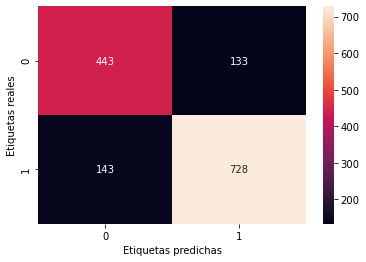

In [454]:
# Graficamos la matriz de confusión en test
print("Accuracy en test:",accuracy_score(y_test, X_test_pred_best_gb))
print("Log-Loss en test:",log_loss(y_test, X_test_pred_proba_best_gb))


sns.heatmap(confusion_matrix(y_test, X_test_pred_best_gb), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

### Pipeline Modelo XGboost

In [275]:
import xgboost as xgb
from xgboost import XGBClassifier

In [276]:
pasos_xgb = [('preprocesamiento', MinMaxScaler()), 
             ('xgb', XGBClassifier())]

pipe_xgb =Pipeline(pasos_xgb)

In [277]:
param_grid_xgb = [{'preprocesamiento':[StandardScaler(), MinMaxScaler()],
                       'xgb__min_child_weight': [5,10], 
                        'xgb__gamma': [1.5 , 5], 
                        'xgb__subsample': [0.6, 1.0],
                        'xgb__colsample_bytree': [0.6, 1.0], 
                        'xgb__max_depth': [3 , 5]}] 
 

In [278]:
grid_xgb =GridSearchCV(pipe_xgb, param_grid_xgb, cv=cv, n_jobs=-1, scoring="neg_log_loss")

grid_xgb.fit(X_train,y_train)

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:33:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_d...
                                                    

In [279]:
xgb_best = grid_xgb.best_estimator_
xgb_best

Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1.0, gamma=1.5, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=5, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1.0, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [280]:
X_train_pred_best_xgb = xgb_best.predict(X_train)
X_train_pred_proba_best_xgb = xgb_best.predict_proba(X_train)

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [281]:
X_test_pred_best_xgb = xgb_best.predict(X_test)
X_test_pred_proba_best_xgb = xgb_best.predict_proba(X_test)

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [282]:
print("Tuned Hyperparameters :", xgb_best)
print("Log-Loss en CV:", grid_xgb.best_score_*-1)

# Tuned Hyperparameters : {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 1.0}
# Accuracy en train: 0.9035816423804984
# Accuracy en CV: 0.8330377019109187

Tuned Hyperparameters : Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1.0, gamma=1.5, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=5, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1.0, tree_method='exact',
                               validate_parameters=1, verbosity=None))])
Log-Loss en CV: 0.3663731334052042


Accuracy en train: 0.9103187466234468
Log-Loss en train: 0.23405159537194975


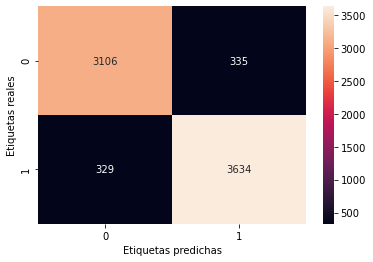

In [283]:
# Graficamos la matriz de confusión en train 
print("Accuracy en train:",accuracy_score(y_train, X_train_pred_best_xgb))
print("Log-Loss en train:",log_loss(y_train, X_train_pred_proba_best_xgb))


sns.heatmap(confusion_matrix(y_train, X_train_pred_best_xgb), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');


Accuracy en test: 0.8466522678185745
Log-Loss en test: 0.36289484040837133


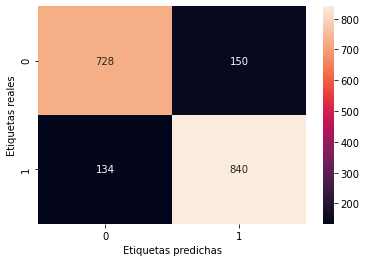

In [284]:
# Graficamos la matriz de confusión en test
print("Accuracy en test:",accuracy_score(y_test, X_test_pred_best_xgb))
print("Log-Loss en test:",log_loss(y_test, X_test_pred_proba_best_xgb))


sns.heatmap(confusion_matrix(y_test, X_test_pred_best_xgb), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

### Pipeline Modelo Adaboost

In [285]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)

In [286]:
pasos_ab = [('preprocesamiento', MinMaxScaler()), 
             ('ab', AdaBoostClassifier(base_estimator=dt,random_state=1))]

pipe_ab =Pipeline(pasos_ab)

In [287]:
param_grid_ab = [{'preprocesamiento':[StandardScaler(), MinMaxScaler()],
                    "ab__n_estimators": [500,1000],
                    "ab__learning_rate":[0.01, 0.1],
                    "ab__base_estimator__max_depth": [1, 2, 3]}] 

In [288]:
grid_ab =GridSearchCV(pipe_ab, param_grid_ab, cv=cv, n_jobs=-1, scoring="neg_log_loss")

grid_ab.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                                       ('ab',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                                                           random_state=1))]),
             n_jobs=-1,
             param_grid=[{'ab__base_estimator__max_depth': [1, 2, 3],
                          'ab__learning_rate': [0.01, 0.1],
                          'ab__n_estimators': [500, 1000],
                          'preprocesamiento': [StandardScaler(),
                                               MinMaxScaler()]}],
             scoring='neg_log_loss')

In [289]:
ab_best = grid_ab.best_estimator_
ab_best

Pipeline(steps=[('preprocesamiento', StandardScaler()),
                ('ab',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.01, n_estimators=500,
                                    random_state=1))])

In [290]:
X_train_pred_best_ab = ab_best.predict(X_train)
X_train_pred_proba_best_ab = ab_best.predict_proba(X_train)

In [291]:
X_test_pred_best_ab = ab_best.predict(X_test)
X_test_pred_proba_best_ab = ab_best.predict_proba(X_test)

In [292]:
print("Tuned Hyperparameters :", ab_best)
print("Log-Loss en CV:", grid_ab.best_score_*-1)

# Tuned Hyperparameters : {'base_estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 1000}
# Accuracy en train: 0.8984066457851014
# Accuracy en CV: 0.8158777310558072


Tuned Hyperparameters : Pipeline(steps=[('preprocesamiento', StandardScaler()),
                ('ab',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.01, n_estimators=500,
                                    random_state=1))])
Log-Loss en CV: 0.5636166680665907


Accuracy en train: 0.831172339276067
Log-Loss en train: 0.5552041837638155


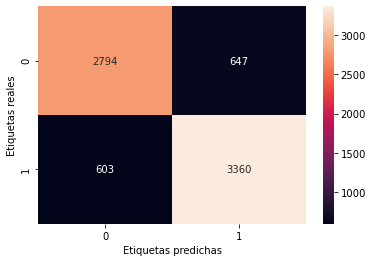

In [293]:
# Graficamos la matriz de confusión en train 
print("Accuracy en train:",accuracy_score(y_train, X_train_pred_best_ab))
print("Log-Loss en train:",log_loss(y_train, X_train_pred_proba_best_ab))


sns.heatmap(confusion_matrix(y_train, X_train_pred_best_ab), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

Accuracy en test: 0.8153347732181425
Log-Loss en test: 0.5628153848862552


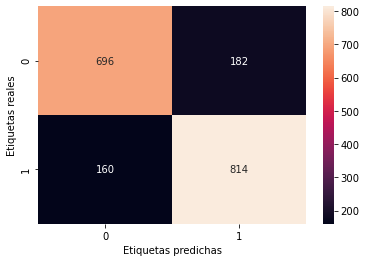

In [294]:
# Graficamos la matriz de confusión en test
print("Accuracy en test:",accuracy_score(y_test, X_test_pred_best_ab))
print("Log-Loss en test:",log_loss(y_test, X_test_pred_proba_best_ab))


sns.heatmap(confusion_matrix(y_test, X_test_pred_best_ab), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

# Feature Selection <a class="anchor" id="6-bullet"></a>

#### Eliminación Recursiva de Features con Cross Validation (RFECV)

In [193]:
scaler_min_max = MinMaxScaler()
X_train_std = scaler_min_max.fit_transform(X_train)
X_test_std = scaler_min_max.transform(X_test)

In [194]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

cv = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

gb_best = GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                                            min_samples_leaf=2,
                                            n_estimators=1000, subsample=0.8,random_state=1)

selector = RFE(gb_best, n_features_to_select=150, step = 100)
selector.fit(X_train_std, y_train)
# rdf = RandomForestClassifier(max_depth=30, n_estimators=1000, random_state=1)

# selector2 = RFECV(gb_best, step = 50, cv=cv, scoring = 'neg_log_loss', verbose=2,n_jobs=-1)
# selector2.fit(X_train_std, y_train)

RFE(estimator=GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                                         min_samples_leaf=2, n_estimators=1000,
                                         random_state=1, subsample=0.8),
    n_features_to_select=150, step=100)

In [487]:
selector2.grid_scores_[:20]

array([-0.64507083, -0.63073785, -0.48075938, -0.41654933, -0.38131378,
       -0.35947653, -0.34926812, -0.34705181, -0.3404449 , -0.3356645 ,
       -0.33452432, -0.3350407 , -0.33421762, -0.33140983, -0.33561942,
       -0.33945879, -0.33185838, -0.3379208 , -0.33118821, -0.33178386])

In [493]:
np.arange(986,35,-50)

array([986, 936, 886, 836, 786, 736, 686, 636, 586, 536, 486, 436, 386,
       336, 286, 236, 186, 136,  86,  36])

In [505]:
scores_feat_sel = pd.DataFrame(index=np.arange(986,35,-50),data=selector2.grid_scores_[:20])
scores_feat_sel = scores_feat_sel.reset_index()

In [506]:
scores_feat_sel = scores_feat_sel.rename(columns={0:'neg_log_loss_en_CV','index':'features'})

In [511]:
scores_feat_sel

features  neg_log_loss_en_CV
0        986               -0.65
1        936               -0.63
2        886               -0.48
3        836               -0.42
4        786               -0.38
5        736               -0.36
6        686               -0.35
7        636               -0.35
8        586               -0.34
9        536               -0.34
10       486               -0.33
11       436               -0.34
12       386               -0.33
13       336               -0.33
14       286               -0.34
15       236               -0.34
16       186               -0.33
17       136               -0.34
18        86               -0.33
19        36               -0.33

In [510]:
scores_feat_sel.sort_values(by='features',ascending=False)

features  neg_log_loss_en_CV
0        986               -0.65
1        936               -0.63
2        886               -0.48
3        836               -0.42
4        786               -0.38
5        736               -0.36
6        686               -0.35
7        636               -0.35
8        586               -0.34
9        536               -0.34
10       486               -0.33
11       436               -0.34
12       386               -0.33
13       336               -0.33
14       286               -0.34
15       236               -0.34
16       186               -0.33
17       136               -0.34
18        86               -0.33
19        36               -0.33

In [ ]:
plt.figsize()
sns.lineplot(x=scores_feat_sel.features,y=scores_feat_sel.neg_log_loss_en_CV)

In [472]:
pd.DataFrame(selector2.support_).value_counts()

True     886
False    100
dtype: int64

In [196]:
(selector.support_)

X_train.loc[:,selector.support_].columns

Index(['Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'ASP_(converted)', 'time_to_delivery',
       'delivery_timeframe', 'account_seniority',
       'total_amount_converted_currency', 'Region_APAC',
       ...
       'Product_Name_Product_Name_464', 'opport_validity_10',
       'opport_validity_100', 'opport_validity_20', 'opport_validity_200',
       'opport_validity_30', 'opport_validity_300', 'opport_validity_40',
       'opport_validity_75', 'opport_validity_UNID'],
      dtype='object', length=150)

Analizando el ranking, pareciera que las features vinculadas al territorio o región son las principales en la eliminación recusriva de features. 

In [195]:
scores = pd.DataFrame()
scores["Ranking"] = selector.ranking_
scores["Attribute Name"] = X_train.columns
scores["Support"] = selector.support_

scores.sort_values(by='Ranking').head()

Ranking                      Attribute Name  Support
0          1  Pricing, Delivery_Terms_Quote_Appr     True
237        1    Opportunity_Owner_Person_Name_19     True
241        1    Opportunity_Owner_Person_Name_23     True
244        1     Opportunity_Owner_Person_Name_3     True
246        1    Opportunity_Owner_Person_Name_32     True

In [196]:
scores.Support.value_counts()

#False    750
#True     283

False    836
True     150
Name: Support, dtype: int64

In [197]:
col_true = scores[scores.Support==True]["Attribute Name"].tolist()

In [198]:
X_train2 = X_train[col_true].drop(columns="Opportunity_ID",errors='ignore')
X_test2 = X_test[col_true].drop(columns="Opportunity_ID",errors='ignore')

In [199]:
X=X[col_true].drop(columns="Opportunity_ID",errors='ignore')

In [200]:
# Nuevo listado de numéricas

numericas = [i for i in numericas if i in X.columns]
numericas

['ASP_(converted)',
 'account_seniority',
 'time_to_delivery',
 'delivery_timeframe',
 'total_amount_converted_currency']

In [201]:
categoricas = [i for i in X.columns if i not in numericas]
len(categoricas)

145

#### GradientBoosting con eliminación recursiva

In [202]:
pasos_gb = [('preprocesamiento', MinMaxScaler()), 
             ('gb', GradientBoostingClassifier())]

pipe_gb =Pipeline(pasos_gb)

In [203]:
param_grid_gb = [{'preprocesamiento':[StandardScaler(), MinMaxScaler()],
                       'gb__n_estimators': [750], 
                        'gb__learning_rate': [0.05,0.1], 
                        'gb__max_depth': [8],
                        'gb__min_samples_leaf': [10],
                        'gb__subsample': [0.8],
                        'gb__max_features': ["log2","sqrt"]}] 


In [204]:
grid_gb =GridSearchCV(pipe_gb, param_grid_gb, cv=cv, n_jobs=-1, scoring="neg_log_loss")

In [205]:
grid_gb.fit(X_train2,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                                       ('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid=[{'gb__learning_rate': [0.05, 0.1],
                          'gb__max_depth': [8],
                          'gb__max_features': ['log2', 'sqrt'],
                          'gb__min_samples_leaf': [10],
                          'gb__n_estimators': [750], 'gb__subsample': [0.8],
                          'preprocesamiento': [StandardScaler(),
                                               MinMaxScaler()]}],
             scoring='neg_log_loss')

In [206]:
gb_best = grid_gb.best_estimator_


In [207]:
X_train_pred_best_gb = gb_best.predict(X_train2)
X_train_pred_proba_best_gb = gb_best.predict_proba(X_train2)

In [208]:
X_test_pred_best_gb = gb_best.predict(X_test2)
X_test_pred_proba_best_gb = gb_best.predict_proba(X_test2)

In [209]:
print("Tuned Hyperparameters :", gb_best)
print("Log-Loss en CV:", grid_gb.best_score_*-1)

# Tuned Hyperparameters : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}
# Accuracy en train: 0.9620046302601116
# Accuracy en CV: 0.8350801208629569

Tuned Hyperparameters : Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                ('gb',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=8,
                                            max_features='sqrt',
                                            min_samples_leaf=10,
                                            n_estimators=750, subsample=0.8))])
Log-Loss en CV: 0.32063293991165187


Accuracy en train: 0.9812553251917069
Log-Loss en train: 0.12387331761354002


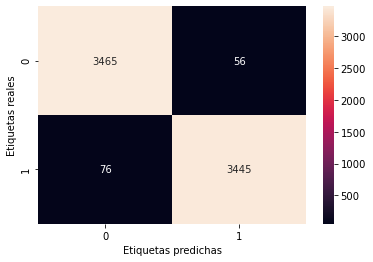

In [210]:
# Graficamos la matriz de confusión en train 
print("Accuracy en train:",accuracy_score(y_train, X_train_pred_best_gb))
print("Log-Loss en train:",log_loss(y_train, X_train_pred_proba_best_gb))


sns.heatmap(confusion_matrix(y_train, X_train_pred_best_gb), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');


Accuracy en test: 0.8134070490670352
Log-Loss en test: 0.42199469486261393


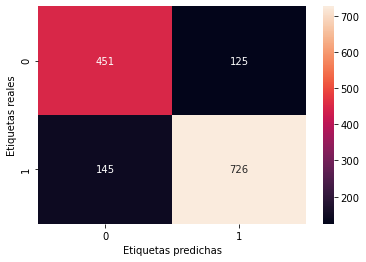

In [211]:
# Graficamos la matriz de confusión en test
print("Accuracy en test:",accuracy_score(y_test, X_test_pred_best_gb))
print("Log-Loss en test:",log_loss(y_test, X_test_pred_proba_best_gb))


sns.heatmap(confusion_matrix(y_test, X_test_pred_best_gb), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

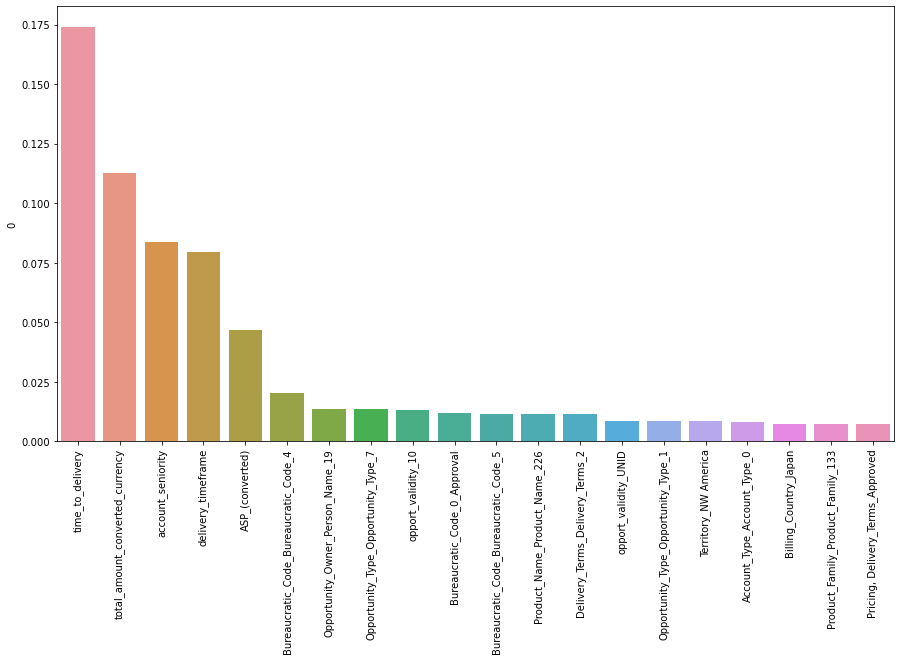

In [212]:
importances = gb_best.steps[1][1].feature_importances_
columns = X.columns
indices = np.argsort(importances)[::-1]
top_20 = pd.DataFrame(index=X.columns,data=importances).sort_values(by=0,ascending=False).head(20)

plt.figure(figsize = (15,8))
sns.barplot(x=top_20.index,y=top_20[0])
plt.xticks(rotation=90);

### Pipeline Modelo Random Forest

In [213]:
cv = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [214]:
pasos_rf = [('preprocesamiento', MinMaxScaler()), 
             ('rf', RandomForestClassifier(random_state=1))]

pipe_rf =Pipeline(pasos_rf)

In [215]:
param_grid_rf = [{'preprocesamiento':[StandardScaler(), MinMaxScaler()],
                       'rf__n_estimators': [300], 
                        'rf__criterion': ['gini'],
                 'rf__max_features': ['auto']}] 


In [216]:
grid_rf =GridSearchCV(pipe_rf, param_grid_rf, cv=cv, n_jobs=-1, scoring="neg_log_loss")

grid_rf.fit(X_train2,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'preprocesamiento': [StandardScaler(),
                                               MinMaxScaler()],
                          'rf__criterion': ['gini'],
                          'rf__max_features': ['auto'],
                          'rf__n_estimators': [300]}],
             scoring='neg_log_loss')

In [217]:
best_random = grid_rf.best_estimator_
best_random

Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                ('rf',
                 RandomForestClassifier(n_estimators=300, random_state=1))])

In [218]:
X_train_pred_best_rf = best_random.predict(X_train2)
X_train_pred_proba_best_rf = best_random.predict_proba(X_train2)


In [219]:
X_test_pred_best_rf = best_random.predict(X_test2)
X_test_pred_proba_best_rf = best_random.predict_proba(X_test2)

In [220]:
print("Tuned Hyperparameters :", best_random)
print("Log-Loss en CV:", grid_rf.best_score_*-1)

Tuned Hyperparameters : Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                ('rf',
                 RandomForestClassifier(n_estimators=300, random_state=1))])
Log-Loss en CV: 0.3038747567481412


Accuracy en train: 0.9997159897756319
Log-Loss en train: 0.08175203155001863


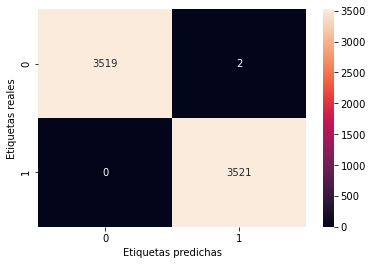

In [221]:
# Graficamos la matriz de confusión en train 
print("Accuracy en train:",accuracy_score(y_train, X_train_pred_best_rf))
print("Log-Loss en train:",log_loss(y_train, X_train_pred_proba_best_rf))


sns.heatmap(confusion_matrix(y_train, X_train_pred_best_rf), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');


Accuracy en test: 0.8134070490670352
Log-Loss en test: 0.3960805434263513


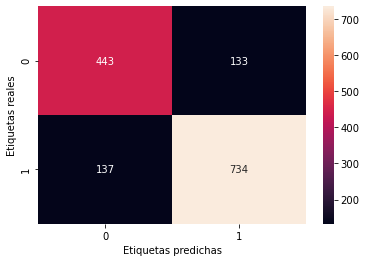

In [222]:
# Graficamos la matriz de confusión en test
print("Accuracy en test:",accuracy_score(y_test, X_test_pred_best_rf))
print("Log-Loss en test:",log_loss(y_test, X_test_pred_proba_best_rf))

sns.heatmap(confusion_matrix(y_test, X_test_pred_best_rf), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

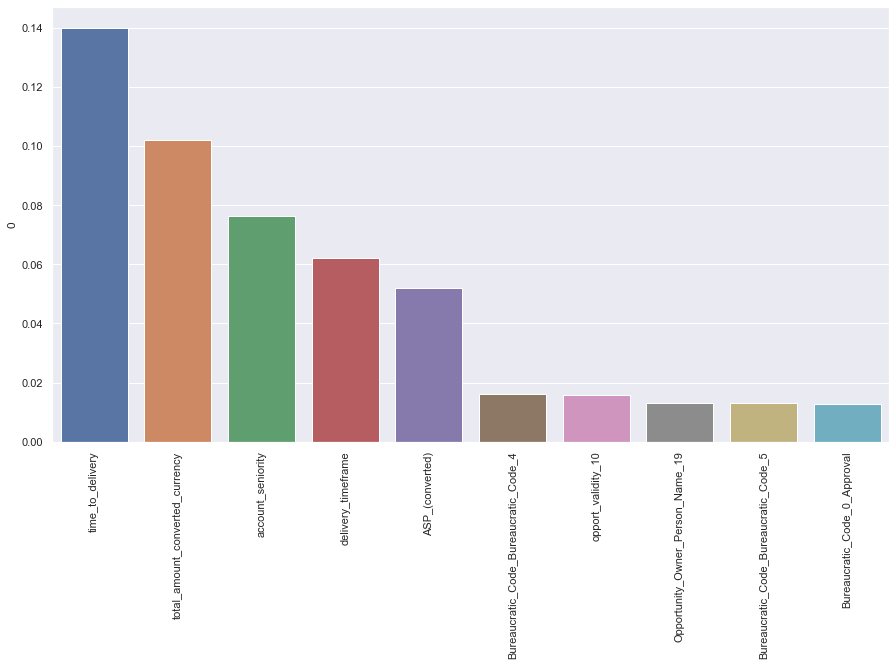

In [223]:
importances = best_random.steps[1][1].feature_importances_
columns = X_train2.columns
indices = np.argsort(importances)[::-1]
top_20 = pd.DataFrame(index=X_train2.columns,data=importances).sort_values(by=0,ascending=False).head(10)
sns.set(font_scale = 1)
plt.figure(figsize = (15,8))
sns.barplot(x=top_20.index,y=top_20[0])
plt.xticks(rotation=90);

### PCA - FEATURE IMPORTANCE - FEATURE SELECTION <a class="anchor" id="7-bullet"></a>

In [224]:
from lime import lime_tabular

# corremos un Random Forest para aplicar LIME 
# gb_best = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
best_random.fit(X_train2,y_train)

#Transformamos a nd array para crear una instancia de LIME Tabular explainer 
X_train_explainer = np.array(X_train2)
type(X_train_explainer)

explainer = lime_tabular.LimeTabularExplainer(X_train_explainer, 
                                 mode = "classification",
                                 training_labels = y_train,
                                 feature_names = X_train2.columns, 
                                 discretize_continuous=True, 
                                 discretizer = 'decile')

In [225]:
i = 3
# necesito que sea un np array:
data_row = np.array(X_test2.iloc[i])
explanation = explainer.explain_instance(data_row, best_random.predict_proba, num_features=5)

explanation.as_list()

[('6.00 < time_to_delivery <= 12.00', 0.1332538208922371),
 ('Opportunity_Owner_Person_Name_19 <= 0.00', -0.09939347756974319),
 ('0.00 < opport_validity_10 <= 1.00', 0.0796273267890665),
 ('Product_Name_Product_Name_226 <= 0.00', -0.0678696263229219),
 ('Bureaucratic_Code_0_Approval <= 0.00', 0.031093463823368913)]

In [226]:
explanation.show_in_notebook(show_table=True)

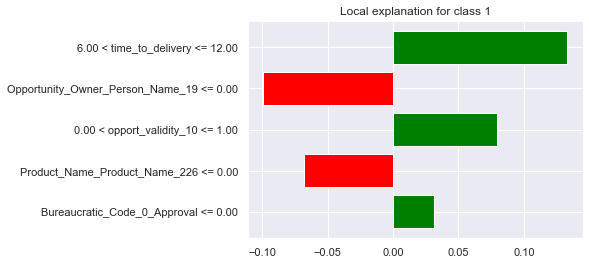

In [227]:
explanation.as_pyplot_figure();

El gráfico tiene tres partes:

* El panel de la izquierda muestra la probabilidad predicha por el modelo (random forest en este caso) para el registro de índice 13 de pertenecer a la clase 0 y de pertencer a la clase 1

* El panel del medio muestra las features por orden de importancia. Como en este caso es una clasificación binaria, vemos dos colores. Las features que tienen color naranja son compatibles con la clase 1 y los que tienen color azul son compatibles con la clase 0. 
Sex_le = 1 significa que cuando el valor de esta feature satisface este criterio, admite la clase 0. 
El número de coma flotante en las barras horizontales representa la importancia relativa de estas features.

* El panel de la derecha usa el mismo código de color que los otros dos. Contiene los valores que corresponden a la fila del DataFrame (la de índice 13) cuya predicción estamos explicando.


In [241]:
X_test_pred_proba_best_rf[:30,1]

array([0.57666667, 0.96666667, 0.96333333, 0.71      , 0.98333333,
       1.        , 0.69333333, 0.79      , 0.44333333, 0.65333333,
       1.        , 0.46333333, 1.        , 0.55666667, 0.93      ,
       0.67333333, 0.99333333, 0.20333333, 0.23      , 0.95666667,
       0.25      , 0.86666667, 0.61666667, 0.93666667, 0.02333333,
       0.93      , 0.82333333, 0.31      , 0.54666667, 0.12333333])

In [245]:
i = 27
# necesito que sea un np array:
data_row = np.array(X_test2.iloc[i])
explanation = explainer.explain_instance(data_row, best_random.predict_proba, num_features=5)

explanation.as_list()

[('123.00 < time_to_delivery <= 182.90', -0.1251458762747487),
 ('Opportunity_Owner_Person_Name_19 <= 0.00', -0.11516040328169372),
 ('opport_validity_10 <= 0.00', -0.08144745185299118),
 ('delivery_timeframe <= 0.00', 0.06693339408657967),
 ('account_seniority <= 0.00', -0.05851835526525234)]

In [246]:
explanation.show_in_notebook(show_table=True)

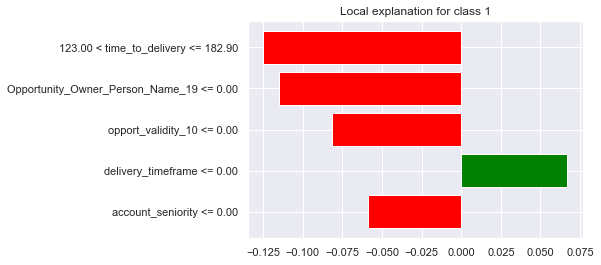

In [247]:
explanation.as_pyplot_figure();



# Datos de Validación <a class="anchor" id="8-bullet"></a>

In [277]:
data = pd.read_csv('Validacion_ECI_2020.csv')

En primer lugar, vemos un sample del dataset para observar las columnas y en qué consisten sus valores. A su vez, vemos la información de cada columna.

In [278]:
data.head(3)

ID Region Territory  Pricing, Delivery_Terms_Quote_Appr  \
0  6140   EMEA   Germany                                   1   
1  6146   EMEA   Germany                                   1   
2  6151   EMEA   Germany                                   1   

   Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
0                                 1                             1   
1                                 1                             1   
2                                 1                             1   

   Bureaucratic_Code_0_Approved  Submitted_for_Approval    Bureaucratic_Code  \
0                             1                       0  Bureaucratic_Code_4   
1                             1                       0  Bureaucratic_Code_4   
2                             1                       0  Bureaucratic_Code_4   

  Account_Created_Date  ...     Month Delivery_Quarter Delivery_Year  \
0             7/5/2017  ...  2019 - 5               Q2          2019   
1             7/5/2017  ...  2019 - 5               Q2          2019   
2             7/5/2017  ...  2019 - 5               Q2          2019   

  Actual_Delivery_Date  TRF Total_Amount_Currency Total_Amount  \
0                  NaT    0                   EUR    162240.00   
1                  NaT    0                   EUR     78624.00   
2                  NaT    0                   EUR    126555.00   

  Total_Taxable_Amount_Currency Total_Taxable_Amount       Prod_Category_A  
0                           EUR            367419.00  Prod_Category_A_None  
1                           EUR            367419.00  Prod_Category_A_None  
2                           EUR            367419.00  Prod_Category_A_None  

[3 rows x 51 columns]

In [279]:
data.iloc[3,:]

ID                                                     6118
Region                                                 EMEA
Territory                                           Germany
Pricing, Delivery_Terms_Quote_Appr                        1
Pricing, Delivery_Terms_Approved                          1
Bureaucratic_Code_0_Approval                              1
Bureaucratic_Code_0_Approved                              1
Submitted_for_Approval                                    0
Bureaucratic_Code                       Bureaucratic_Code_4
Account_Created_Date                               7/5/2017
Source                                             Source_7
Billing_Country                                     Germany
Account_Name                               Account_Name_978
Opportunity_Name                      Opportunity_Name_6117
Opportunity_ID                                        10690
Sales_Contract_No                                      6504
Account_Owner                           

In [280]:
data.shape

(2551, 51)

In [281]:
data.Opportunity_ID.unique().shape  

(1567,)

In [282]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  2551 non-null   int64  
 1   Region                              2551 non-null   object 
 2   Territory                           2551 non-null   object 
 3   Pricing, Delivery_Terms_Quote_Appr  2551 non-null   int64  
 4   Pricing, Delivery_Terms_Approved    2551 non-null   int64  
 5   Bureaucratic_Code_0_Approval        2551 non-null   int64  
 6   Bureaucratic_Code_0_Approved        2551 non-null   int64  
 7   Submitted_for_Approval              2551 non-null   int64  
 8   Bureaucratic_Code                   2551 non-null   object 
 9   Account_Created_Date                2551 non-null   object 
 10  Source                              2551 non-null   object 
 11  Billing_Country                     2551 no

Podemos observar que el dataset cuenta con **52 columnas** y **16947 filas**. Esto nos brinda una gran cantida de datos para entrenar un  modelo. A su vez, contamos con 4 tipos de variables: **binarias, categóricas, numéricas y fechas**. Finalmente, hay 3 columnas (_ASP_, _ASP-(converted)_ y _Total-Amount_) que poseen **valores nulos**.

Para seguir, clasificamos las features en las 4 categorías mencionadas anteriormente.


In [283]:
data.rename(columns = {'Source ':'Source'},inplace=True)

In [284]:
# Clasificación de features 

binarias = ['Pricing, Delivery_Terms_Quote_Appr', 'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
            'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval'] 

categoricas = ['Region','Territory', 'Bureaucratic_Code', 'Source', 'Billing_Country', 'Account_Name',
              'Opportunity_Name', 'Account_Owner', 'Opportunity_Owner', 'Account_Type', 'Opportunity_Type',
              'Quote_Type', 'Delivery_Terms', 'Brand', 'Product_Type', 'Size', 'Product_Category_B', 
              'Last_Modified_By', 'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP_(converted)_Currency', 
              'Delivery_Quarter', 'Total_Amount_Currency', 'Total_Taxable_Amount_Currency', 'Prod_Category_A']

date = ['Account_Created_Date', 'Opportunity_Created_Date', 'Last_Activity', 'Quote_Expiry_Date', 
           'Last_Modified_Date', 'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
           'Delivery_Year', 'Actual_Delivery_Date']

numericas = ['ID', 'Sales_Contract_No', 'Price', 'ASP', 'ASP_(converted)', 'TRF', 'Total_Amount', 
            'Total_Taxable_Amount']
otras = ['Opportunity_ID']

Observamos los "Opportunity_ID" para ver que diferencias hay entre aquellos que poseen el mismo ID. Total_Taxable_Amount es la suma de Total_Amount del mismo ID.

In [285]:
data["Opportunity_ID"].value_counts(ascending=False).head()

12266    26
10973    24
11089    18
11869    15
11248    11
Name: Opportunity_ID, dtype: int64

In [286]:
print(data.loc[data.Opportunity_ID == 12460,"Total_Taxable_Amount"].value_counts())
data.loc[data.Opportunity_ID == 12460,"Total_Amount"].sum()

Series([], Name: Total_Taxable_Amount, dtype: int64)


0.0

### Preprocesamiento de fechas

#### Sacamos los nulos de Planned_Delivery_End_Date imputando mediante las columnas Month y Delivery_Year

In [287]:
mes = data['Month'].apply(lambda x: x[-2:]).astype("str")
data.loc[data["Planned_Delivery_End_Date"]=="NaT","Planned_Delivery_End_Date"] = "1/"+mes+"/"+data["Delivery_Year"].astype("str")
data["Planned_Delivery_End_Date"]

0        5/31/2019
1        5/31/2019
2        5/31/2019
3        6/28/2019
4        6/29/2019
           ...    
2546     5/10/2019
2547    12/31/2019
2548    12/31/2019
2549      8/1/2019
2550    12/13/2019
Name: Planned_Delivery_End_Date, Length: 2551, dtype: object

In [288]:
data.iloc[1450,data.columns.isin(["Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Month","Delivery_Year"])]

Planned_Delivery_Start_Date     2/1/2020
Planned_Delivery_End_Date      5/31/2020
Month                           2020 - 2
Delivery_Year                       2020
Name: 1450, dtype: object

In [289]:
data.isna().mean().sort_values(ascending=False).head(10)

ASP                 0.03
ASP_(converted)     0.03
Prod_Category_A     0.00
Delivery_Terms      0.00
Quote_Type          0.00
Opportunity_Type    0.00
Account_Type        0.00
Opportunity_Owner   0.00
Account_Owner       0.00
Sales_Contract_No   0.00
dtype: float64

In [290]:
data["Planned_Delivery_End_Date"].value_counts()

12/31/2019    160
6/28/2019     105
6/30/2019     104
3/31/2019      99
3/29/2019      95
             ... 
6/5/2019        1
12/5/2019       1
5/18/2019       1
5/8/2020        1
4/28/2019       1
Name: Planned_Delivery_End_Date, Length: 285, dtype: int64

In [291]:
data['Planned_Delivery_Start_Date'] = pd.to_datetime(data['Planned_Delivery_Start_Date'], infer_datetime_format = True)
data["Planned_Delivery_Start_Date"] = data["Planned_Delivery_Start_Date"].map(datetime.datetime.toordinal)

data['Planned_Delivery_End_Date'] = pd.to_datetime(data['Planned_Delivery_End_Date'], infer_datetime_format = True)
data["Planned_Delivery_End_Date"] = data["Planned_Delivery_End_Date"].map(datetime.datetime.toordinal)

groupby_delivery_date= data[["Opportunity_ID","Planned_Delivery_Start_Date",'Planned_Delivery_End_Date']].groupby("Opportunity_ID").transform("mean")

In [292]:
groupby_delivery_date.sort_values(by="Planned_Delivery_End_Date",ascending=True)

Planned_Delivery_Start_Date  Planned_Delivery_End_Date
915                     737089.00                  737060.00
914                     737089.00                  737060.00
373                     737083.00                  737060.00
404                     737086.00                  737060.00
657                     737104.00                  737061.00
...                           ...                        ...
1271                    737730.00                  737759.00
1345                    737425.00                  737790.00
1367                    737425.00                  737790.00
149                     737699.00                  737790.00
1273                    737607.00                  737790.00

[2551 rows x 2 columns]

In [293]:
groupby_delivery_date['Planned_Delivery_Start_Date'] = groupby_delivery_date['Planned_Delivery_Start_Date'].apply(lambda x: pd.Timestamp.fromordinal(int(x)))

In [294]:
groupby_delivery_date['Planned_Delivery_End_Date'] = groupby_delivery_date['Planned_Delivery_End_Date'].apply(lambda x:  pd.Timestamp.fromordinal(int(x)))

In [295]:
data["Planned_Delivery_Start_Date"]=groupby_delivery_date["Planned_Delivery_Start_Date"]
data["Planned_Delivery_End_Date"]=groupby_delivery_date["Planned_Delivery_End_Date"]

In [296]:
data[["Planned_Delivery_Start_Date","Planned_Delivery_End_Date"]].isna().sum()

Planned_Delivery_Start_Date    0
Planned_Delivery_End_Date      0
dtype: int64

Por otro lado, observamos que varias columnas en lugar de marcar un valor como nulo (NaN), simplemente figuran como valor "None". Esto hace que en un principio no se estén considerando estos valores como nulos. Vemos un ejemplo más claro:

In [297]:
data[["Planned_Delivery_Start_Date","Planned_Delivery_End_Date"]]

Planned_Delivery_Start_Date Planned_Delivery_End_Date
0                     2019-05-01                2019-05-31
1                     2019-05-01                2019-05-31
2                     2019-05-01                2019-05-31
3                     2019-06-01                2019-06-28
4                     2019-06-01                2019-06-28
...                          ...                       ...
2546                  2019-05-01                2019-05-10
2547                  2019-10-01                2019-12-31
2548                  2019-10-01                2019-12-31
2549                  2019-08-01                2019-08-01
2550                  2019-10-21                2019-12-13

[2551 rows x 2 columns]

#### Total_Amount cuenta con 59 filas de datos NA, que terminan en Close_Lost, estos casos los imputamos como 0

In [298]:

# data.loc[data.Total_Amount.isna(),['TRF',
#        'Total_Amount_Currency', 'Total_Amount',
#        'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount', 'Stage']]

In [299]:
data.loc[data.Total_Amount.isna(),"Total_Amount"] = 0 

In [300]:
data['Territory'].value_counts()

NW America        427
Germany           273
Australia         208
None              181
NE America        179
SW America        140
France            135
SE America        108
India             106
Central US        105
Netherlands        96
Singapore          90
Japan              85
Italy              71
Belgium            59
Spain              48
United Kingdom     46
Thailand           35
Portugal           20
Austria            18
Taiwan             14
Philippines        11
Indonesia          10
Jordan             10
Poland              7
Canada              7
Sweden              7
Norway              7
South America       5
KSA                 4
Switzerland         4
Finland             4
Cyprus              4
Denmark             3
Carribean           3
Malaysia            3
Hungary             3
Malta               3
New Zealand         2
Saudi Arabia        2
Luxembourg          2
Mongolia            1
China (PRC)         1
Greece              1
Andorra             1
Bulgaria  

Hay **9 features** en el dataset con valores 'None' que deberían ser tomados como null. 

- 'Sales_Contract_No'
- 'Territory'
- 'Account_Type'
- 'Brand'
- 'Size'
- 'Product_Category_B'
- 'Currency'
- 'Source'
- 'Price'

A su vez, hay **X features** con valores 'NaT', que también deberían ser tomados como null. 

Ahora vamos a reemplazar los valores 'None' y 'NaT' por NaN en las 9 columnas que contienen este valor, para poder dimensionar correctamente los nulos en cada columna.

In [301]:
# Convertimos lo 'None' y 'NaT' a np.NaN
data = data.replace("None", np.nan)
data = data.replace("NaT", np.nan)

En primer lugar, trabajamos sobre las columnas que si pueden identificarse valores nulos. 
Vemos la proporción de nulos en estas **3 columnas**

In [302]:
# Features con nulos: 'ASP', 'ASP_(converted)', 'Total_Amount'

print(data['ASP'].isnull().sum() / data.shape[0])
print(data['ASP_(converted)'].isnull().sum() / data.shape[0])
print(data['Total_Amount'].isnull().sum() / data.shape[0])

0.032928263426107406
0.032928263426107406
0.0


Alternativas: 
- Eliminar las filas que contengan nulos 
- Completar con la media por tipo de producto

In [303]:
# Proporción de nulos en cada una de las columnas

print("% nulos Sales_Contract_No:", data['Sales_Contract_No'].isnull().sum() / data.shape[0])
print("% nulos Territory:", data['Territory'].isnull().sum() / data.shape[0])
print("% nulos Account_Type:", data['Account_Type'].isnull().sum() / data.shape[0])
print("% nulos Brand:", data['Brand'].isnull().sum() / data.shape[0])
print("% nulos Size:", data['Size'].isnull().sum() / data.shape[0])
print("% nulos Product_Category_B:", data['Product_Category_B'].isnull().sum() / data.shape[0])
print("% nulos Currency:", data['Currency'].isnull().sum() / data.shape[0])
print("% nulos Source:", data['Source'].isnull().sum() / data.shape[0])
print("% nulos Price:", data['Price'].isnull().sum() / data.shape[0])

% nulos Sales_Contract_No: 0.475499803998432
% nulos Territory: 0.07095256762054096
% nulos Account_Type: 0.0003920031360250882
% nulos Brand: 0.8553508428067425
% nulos Size: 0.8584868678949431
% nulos Product_Category_B: 0.8584868678949431
% nulos Currency: 0.8624068992551941
% nulos Source: 0.43708349666797336
% nulos Price: 0.8596628773030184


In [304]:
size_nulos = data['Size'] != 'None'
data_no_nulos = data.loc[size_nulos,:]
data_no_nulos.iloc[1,:]

ID                                                     6146
Region                                                 EMEA
Territory                                           Germany
Pricing, Delivery_Terms_Quote_Appr                        1
Pricing, Delivery_Terms_Approved                          1
Bureaucratic_Code_0_Approval                              1
Bureaucratic_Code_0_Approved                              1
Submitted_for_Approval                                    0
Bureaucratic_Code                       Bureaucratic_Code_4
Account_Created_Date                               7/5/2017
Source                                             Source_7
Billing_Country                                     Germany
Account_Name                               Account_Name_978
Opportunity_Name                      Opportunity_Name_6118
Opportunity_ID                                        10689
Sales_Contract_No                                      6436
Account_Owner                           

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  2551 non-null   int64         
 1   Region                              2551 non-null   object        
 2   Territory                           2370 non-null   object        
 3   Pricing, Delivery_Terms_Quote_Appr  2551 non-null   int64         
 4   Pricing, Delivery_Terms_Approved    2551 non-null   int64         
 5   Bureaucratic_Code_0_Approval        2551 non-null   int64         
 6   Bureaucratic_Code_0_Approved        2551 non-null   int64         
 7   Submitted_for_Approval              2551 non-null   int64         
 8   Bureaucratic_Code                   2551 non-null   object        
 9   Account_Created_Date                2551 non-null   object        
 10  Source                  

#### Armamos un currency ratio para convertir los total amount

In [306]:
data['ratio_currency'] = data['ASP_(converted)']/data['ASP']

In [307]:
data.loc[data['Total_Taxable_Amount_Currency']=='JPY','ratio_currency']

46     0.01
49     0.01
50     0.01
51     0.01
56     0.01
       ... 
2468   0.01
2512    nan
2513   0.01
2542   0.01
2543   0.01
Name: ratio_currency, Length: 171, dtype: float64

In [308]:
tasas = data[['ratio_currency','Total_Taxable_Amount_Currency']].groupby("Total_Taxable_Amount_Currency").mean().reset_index()

In [309]:
jpy = data.loc[data.Total_Taxable_Amount_Currency == "JPY",["ASP_(converted)","ASP"]].mean(skipna=True).tolist()
jpy[0]/jpy[1]

0.009240214513255823

In [310]:
tasas.loc[tasas['Total_Taxable_Amount_Currency']=='JPY','ratio_currency'] = jpy[0]/jpy[1]
tasas.loc[tasas['Total_Taxable_Amount_Currency']=='USD','ratio_currency'] = 1

In [311]:
tasas

Total_Taxable_Amount_Currency  ratio_currency
0                           EUR            1.13
1                           JPY            0.01
2                           USD            1.00

### Dropeo de Columnas

Ahora podemos ver que hay un mayor porcentaje de nulos en las columnas que tenían valores "None". En algunos casos, vamos a delinear estrategias para imputar dichos valores. 

En primer lugar, vamos a definir qué columnas consideramos que **no aportarán valor al modelo**, y así comenzar a limpiar el dataset. 

In [312]:
data.isna().mean().sort_values(ascending=False).head(15)

Actual_Delivery_Date   1.00
Last_Activity          1.00
Currency               0.86
Price                  0.86
Size                   0.86
Product_Category_B     0.86
Product_Type           0.86
Brand                  0.86
Quote_Expiry_Date      0.48
Sales_Contract_No      0.48
Source                 0.44
Territory              0.07
ratio_currency         0.04
ASP_(converted)        0.03
ASP                    0.03
dtype: float64

In [313]:
data['Product_Category_B'].notnull().sum()

361

In [314]:
# Features que creo que no suman

# 'Opportunity_Name'
# 'Opportunity_ID' 
# 'Last_Modified_By' -- Posible data leakage, es un valor que no se sabe al momento de emitir una cotizacion
#  ASP_(converted)_Currency -- son todos USD
# 'Prod_Category_A' -- son todas iguales "Prod_Category_A_None"
# 'Last_Activity' -- todo NAT
# 'Actual_Delivery_Date' -- todo NAT
data.drop(axis=1, inplace=True,errors='ignore',columns=["ID","Last_Activity","Opportunity_Name","Account_Name","Prod_Category_A","Opportunity_Name","Last_Modified_Date"])

In [315]:
#nos falta muchisima info (90%+) de estas columnas, las droppeamos:

data.drop(axis=1, inplace=True,errors='ignore',columns=['Actual_Delivery_Date','Currency','Price','Size',"Product_Type","Product_Category_B","Brand"])

In [316]:
#un Opportunity_ID puede tener multiples de estos valores, que componen el total de la compra, por ende los eliminamos
#data.drop(axis=1, inplace=True,errors='ignore',columns=["Product_Family", "Product_Name", "Total_Amount"])

##### Dropeamos columnas que no tienen variación en sus registros, por ende no aportan valor

In [317]:
data['Submitted_for_Approval'].value_counts()

0    2537
1      14
Name: Submitted_for_Approval, dtype: int64

In [318]:
data['ASP_(converted)_Currency'].value_counts()

USD    2551
Name: ASP_(converted)_Currency, dtype: int64

In [319]:
data['ASP_Currency'].value_counts()

USD    1547
EUR     836
JPY     168
Name: ASP_Currency, dtype: int64

In [320]:
data['ASP'].value_counts()

0.36     198
0.40     124
0.27     115
0.26     105
0.27      88
        ... 
0.53       1
0.27       1
0.25       1
35.00      1
0.31       1
Name: ASP, Length: 102, dtype: int64

##### En el caso de los precios nos quedamos solamente con la columna que tiene los precios unificados que es la feature "ASP_(Converted)"

In [321]:
data = data.drop(columns=['Submitted_for_Approval','ASP_(converted)_Currency','ASP_Currency', 'ASP'], axis=1)

In [322]:
data['Last_Modified_By'].isna().sum()

0

##### Eliminamos la siguiente columna por Data Leakage

In [323]:
mask_sales_contract_null = data['Sales_Contract_No'].isnull()
# data.loc[mask_sales_contract_null,'Stage'].value_counts()

In [324]:
mask_sales_contract_1 = data['Sales_Contract_No'].notnull()
# data.loc[mask_sales_contract_1,'Stage'].value_counts()

In [325]:
data.drop(inplace=True, axis=1,columns=['Sales_Contract_No'])

##### Luego de eliminar todas las columnas anteriores, nos quedan las siguientes columnas, dentro de las cuales aun debemos resolver algunos nulos:

In [326]:
data.columns

Index(['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Bureaucratic_Code',
       'Account_Created_Date', 'Source', 'Billing_Country', 'Opportunity_ID',
       'Account_Owner', 'Opportunity_Owner', 'Account_Type',
       'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Quote_Expiry_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'TRF', 'Total_Amount_Currency',
       'Total_Amount', 'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount',
       'ratio_currency'],
      dtype='object')

In [327]:
data.isna().mean().sort_values(ascending=False).head(10)

Quote_Expiry_Date                  0.48
Source                             0.44
Territory                          0.07
ratio_currency                     0.04
ASP_(converted)                    0.03
Billing_Country                    0.00
Account_Type                       0.00
Pricing, Delivery_Terms_Approved   0.00
Bureaucratic_Code_0_Approval       0.00
Bureaucratic_Code_0_Approved       0.00
dtype: float64

#### Tratamiento 'Territory'

In [328]:
Territory_Mask = ((data['Territory'].isna()) | (data['Territory'] == "None"))
data['Territory'] = np.where(Territory_Mask, data['Region'],data['Territory'])

In [329]:
data[['Region','Territory']].value_counts()

Region       Territory     
Americas     NW America        427
EMEA         Germany           273
APAC         Australia         208
Japan        Japan             201
Americas     NE America        179
             SW America        140
EMEA         France            135
Americas     SE America        108
APAC         India             106
Americas     Central US        105
EMEA         Netherlands        96
APAC         Singapore          90
EMEA         Italy              71
             Belgium            59
             Spain              48
             United Kingdom     46
Americas     Americas           44
APAC         Thailand           35
EMEA         EMEA               21
             Portugal           20
             Austria            18
APAC         Taiwan             14
             Philippines        11
             Indonesia          10
Middle East  Jordan             10
Americas     Canada              7
EMEA         Sweden              7
             Norway        

#### imputamos Billing_Country faltantes usando Territory y en el caso de ser de EMEA usaremos "Netherlands"

In [330]:
data.loc[data["Billing_Country"].isna(),["Territory","Billing_Country"]].head(5)

Territory Billing_Country
2273  Thailand             NaN

In [331]:
data.loc[data["Territory"]=="EMEA",["Territory","Billing_Country"]].value_counts().head(1)

Territory  Billing_Country
EMEA       France             14
dtype: int64

In [332]:
null_billing_country_mask = data["Billing_Country"].isna()
EMEA_Territory_mask = data["Territory"]=="EMEA"
data.loc[null_billing_country_mask & EMEA_Territory_mask,"Billing_Country"] = "Netherlands"
data.loc[null_billing_country_mask & ~EMEA_Territory_mask,"Billing_Country"] = data["Territory"]

In [333]:
data.isna().mean().sort_values(ascending=False).head(6)

Quote_Expiry_Date                    0.48
Source                               0.44
ratio_currency                       0.04
ASP_(converted)                      0.03
Account_Type                         0.00
Pricing, Delivery_Terms_Quote_Appr   0.00
dtype: float64

#### Tratamiento 'Source'

In [334]:
data['Source'].value_counts()

Source_7     701
Source_9     312
Source_11    204
Source_13    125
Source_3      40
Source_10     21
Source_2      13
Source_1      11
Source_6       6
Source_4       2
Source_5       1
Name: Source, dtype: int64

In [335]:
data['Source'].isna().sum()

1115

In [336]:
mask_source_na = data['Source'].isnull()

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Amount', ylabel='Source'>

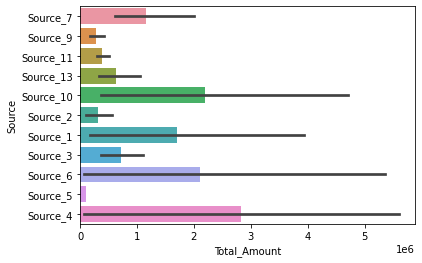

In [337]:
sns.barplot(data['Total_Amount'],data['Source'])

Optamos por poner 'Source' UNID a todos los nulos. 

In [338]:
data.loc[mask_source_na,"Source"] = "UNID"

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


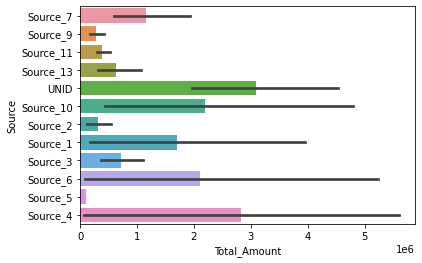

In [339]:
sns.barplot(data['Total_Amount'],data['Source']);

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


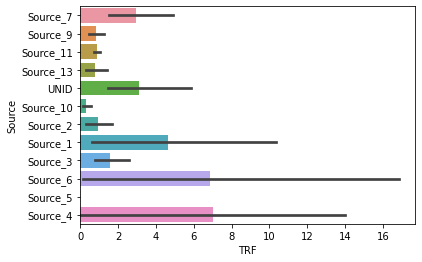

In [340]:
sns.barplot(data['TRF'],data['Source']);

In [341]:
data.columns

Index(['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Bureaucratic_Code',
       'Account_Created_Date', 'Source', 'Billing_Country', 'Opportunity_ID',
       'Account_Owner', 'Opportunity_Owner', 'Account_Type',
       'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Quote_Expiry_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'TRF', 'Total_Amount_Currency',
       'Total_Amount', 'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount',
       'ratio_currency'],
      dtype='object')

In [342]:
data.loc[mask_source_na,'Account_Owner'].value_counts().head()

Person_Name_64    130
Person_Name_18    128
Person_Name_8      92
Person_Name_3      69
Person_Name_46     67
Name: Account_Owner, dtype: int64

In [343]:
data.loc[data['Account_Owner']=='Person_Name_50' ,'Source'].value_counts()

UNID         62
Source_11     2
Source_10     1
Name: Source, dtype: int64

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


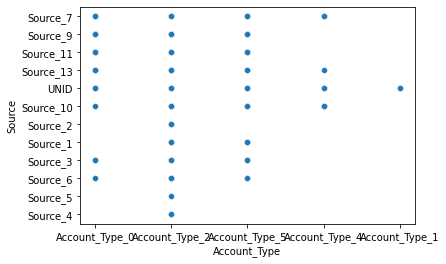

In [344]:
sns.scatterplot(data['Account_Type'],data['Source']);

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Account_Owner', ylabel='Source'>

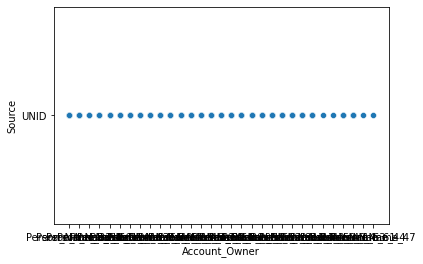

In [345]:
sns.scatterplot(data.loc[mask_source_na,'Account_Owner'],data.loc[mask_source_na,'Source'])

In [346]:
data.isna().mean().sort_values(ascending=False).head(6)

Quote_Expiry_Date   0.48
ratio_currency      0.04
ASP_(converted)     0.03
Account_Type        0.00
Quote_Type          0.00
Opportunity_Owner   0.00
dtype: float64

### Tratamiento ASP_(converted)

In [347]:
data.corr()["ASP_(converted)"].sort_values(ascending=False)

ASP_(converted)                       1.00
Bureaucratic_Code_0_Approval          0.03
Opportunity_ID                        0.01
Pricing, Delivery_Terms_Quote_Appr    0.01
Total_Amount                          0.01
Total_Taxable_Amount                  0.01
ratio_currency                        0.00
Delivery_Year                         0.00
TRF                                  -0.00
Bureaucratic_Code_0_Approved         -0.01
Pricing, Delivery_Terms_Approved     -0.02
Name: ASP_(converted), dtype: float64

C:\Users\Fede\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ASP_(converted)', ylabel='Source'>

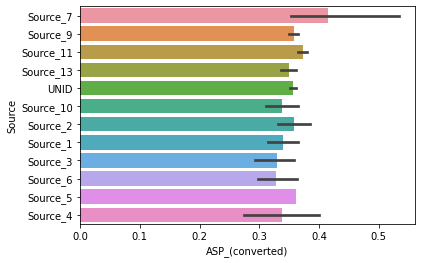

In [348]:
sns.barplot(data['ASP_(converted)'],data['Source'])

In [349]:
mask_asp_nulos = data['ASP_(converted)'].isnull()
data.loc[mask_asp_nulos,'Source'].value_counts()

UNID         59
Source_9     10
Source_7     10
Source_3      2
Source_11     2
Source_13     1
Name: Source, dtype: int64

##### Casi todos los nulos de ASP pertenecen a la clase "UNID" y, como podemos ver en el grafico, la dispersion de valores de ASP para esa clase es baja, por lo que vamos a imputar los nulos de ASP por la media del "Source" al que corresponden.

In [350]:
asp_groupby_source = data.groupby(by='Source')['ASP_(converted)'].mean()

In [351]:
data.loc[mask_asp_nulos,'ASP_(converted)'] = data.loc[mask_asp_nulos,:].apply(lambda x:asp_groupby_source[x.Source],axis=1)

In [352]:
data.isna().mean().sort_values(ascending=False).head(5)

Quote_Expiry_Date   0.48
ratio_currency      0.04
Account_Type        0.00
Source              0.00
Opportunity_Owner   0.00
dtype: float64

#### Tratamiento Account_Type 

In [353]:
mask_null_account_type = data['Account_Type'].isnull()
data.loc[mask_null_account_type,"Account_Type"] = "UNID"

### Tratamiento Quote_Expiry_Date

In [354]:
pd.Timestamp.fromordinal(750000)

Timestamp('2054-06-06 00:00:00')

In [355]:
data.loc[3,"Quote_Expiry_Date"]

'4/30/2019'

In [356]:
#convertimos aquellas quotes que no expiran a una fecha muy lejana
# data.loc[data.Quote_Expiry_Date.isnull(),["Quote_Expiry_Date"]] = pd.Timestamp('2054-06-06 00:00:00')
data.loc[data.Quote_Expiry_Date.isnull(),["Quote_Expiry_Date"]] = data.loc[data.Quote_Expiry_Date.isnull(),:].apply(lambda x: x.Opportunity_Created_Date,axis=1)

In [357]:
data.loc[3,"Quote_Expiry_Date"]

'4/30/2019'

In [358]:
data.isna().mean().sort_values(ascending=False).head(5)

ratio_currency      0.04
Source              0.00
Opportunity_Type    0.00
Account_Type        0.00
Opportunity_Owner   0.00
dtype: float64

In [359]:
data.shape

(2551, 34)

### Features de fechas se pasan a formato DateTime

In [360]:
# Nuevo listado de datetime
date = ['Quote_Expiry_Date','Opportunity_Created_Date','Account_Created_Date']
#date.remove('Delivery_Year')
date

['Quote_Expiry_Date', 'Opportunity_Created_Date', 'Account_Created_Date']

In [361]:
for i in range(len(date)):
    data[date[i]] = pd.to_datetime(data[date[i]], infer_datetime_format = True)

In [362]:
data['time_to_delivery'] = (data['Planned_Delivery_Start_Date'] - data['Opportunity_Created_Date'])


In [363]:
data['opport_validity'] = (data['Quote_Expiry_Date'] - data['Opportunity_Created_Date'])


In [364]:
data['delivery_timeframe'] = (data['Planned_Delivery_End_Date'] - data['Planned_Delivery_Start_Date'])

In [365]:
data['account_seniority'] = (data['Opportunity_Created_Date'] - data['Account_Created_Date'] )
data['account_seniority'].head()

0   646 days
1   646 days
2   646 days
3   646 days
4   646 days
Name: account_seniority, dtype: timedelta64[ns]

In [366]:
data.iloc[3,:]

Region                                               EMEA
Territory                                         Germany
Pricing, Delivery_Terms_Quote_Appr                      1
Pricing, Delivery_Terms_Approved                        1
Bureaucratic_Code_0_Approval                            1
Bureaucratic_Code_0_Approved                            1
Bureaucratic_Code                     Bureaucratic_Code_4
Account_Created_Date                  2017-07-05 00:00:00
Source                                           Source_7
Billing_Country                                   Germany
Opportunity_ID                                      10690
Account_Owner                              Person_Name_13
Opportunity_Owner                          Person_Name_13
Account_Type                               Account_Type_0
Opportunity_Type                       Opportunity_Type_8
Quote_Type                                    Non Binding
Delivery_Terms                           Delivery_Terms_2
Opportunity_Cr

#### Los convertimos a float para poder filtrar

In [367]:
data['account_seniority'] = data['account_seniority']/np.timedelta64(1, 'D')

In [368]:
data['opport_validity'] = data['opport_validity']/np.timedelta64(1, 'D')

In [369]:
data['time_to_delivery'] = data['time_to_delivery']/np.timedelta64(1, 'D')

In [370]:
data['delivery_timeframe'] = data['delivery_timeframe']/np.timedelta64(1, 'D')

In [371]:
validity_category = pd.cut(data.opport_validity,bins=[-10000,0,10,20,30,40,75,100,200,300,10000],labels=['UNID','10','20','30','40','75','100','200','300','>1_year'])

In [372]:
validity_category.value_counts(normalize=True)

UNID      0.50
10        0.12
20        0.11
30        0.09
40        0.06
75        0.05
200       0.03
300       0.02
100       0.01
>1_year   0.00
Name: opport_validity, dtype: float64

In [373]:
data['opport_validity'] = validity_category

#### Dropeamos las columnas con fechas que no aportan al modelo/ tienen posible data leakage y nos quedamos con las 2 columnas que creamos arriba

In [374]:
data.drop(columns=['Opportunity_Created_Date','Quote_Expiry_Date','Planned_Delivery_Start_Date',
 'Planned_Delivery_End_Date','Month','Account_Created_Date','Delivery_Year','Delivery_Quarter'],inplace=True)

In [375]:
data.loc[data['account_seniority']<0,'account_seniority']=0

In [376]:
data.loc[data['delivery_timeframe']<0,'delivery_timeframe']=0

In [377]:
data.loc[data['time_to_delivery']<0,'time_to_delivery']=0

In [378]:
data.shape

(2551, 30)

In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Region                              2551 non-null   object  
 1   Territory                           2551 non-null   object  
 2   Pricing, Delivery_Terms_Quote_Appr  2551 non-null   int64   
 3   Pricing, Delivery_Terms_Approved    2551 non-null   int64   
 4   Bureaucratic_Code_0_Approval        2551 non-null   int64   
 5   Bureaucratic_Code_0_Approved        2551 non-null   int64   
 6   Bureaucratic_Code                   2551 non-null   object  
 7   Source                              2551 non-null   object  
 8   Billing_Country                     2551 non-null   object  
 9   Opportunity_ID                      2551 non-null   int64   
 10  Account_Owner                       2551 non-null   object  
 11  Opportunity_Owner             

#### Binarización del Target

Para un modelo, es importante a su vez que la **variable target** esté bien distribuida, es decir, que haya suficientes casos de todos los posibles outcomes. Vemos la cantidad de valores en la columna para "Closed Won" y "Closed Lost". 

In [380]:
# Closed Won y Closed Lost estan balanceadas. 
# data['Stage'].value_counts(normalize = True)

Podemos observar que los valores de Closed Won y Closed Lost se encuentran balanceados. Para hacer el modelo más eficiente, vamos a reemplazar las otras 3 categorías y considerarlas "Closed Lost". 

In [381]:
# Stage_Mask = (data['Stage'] == "Closed Won") | (data['Stage'] == "Closed Lost") 
# data = data[Stage_Mask]

In [382]:
# #Binarizando el target
# # 'Closed Won' = 1 
# # 'Clodes Lost' = 0

# data['Stage_bin'] = data['Stage'].apply(lambda x: 1 if x == 'Closed Won' else 0)

# data['Stage_bin'].value_counts(normalize = True)


In [383]:
# data.drop(inplace=True, axis=1,columns=["Stage"])

In [384]:
data.shape

(2551, 30)

In [385]:
data.columns

Index(['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Bureaucratic_Code', 'Source',
       'Billing_Country', 'Opportunity_ID', 'Account_Owner',
       'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type',
       'Delivery_Terms', 'Last_Modified_By', 'Product_Family', 'Product_Name',
       'ASP_(converted)', 'TRF', 'Total_Amount_Currency', 'Total_Amount',
       'Total_Taxable_Amount_Currency', 'Total_Taxable_Amount',
       'ratio_currency', 'time_to_delivery', 'opport_validity',
       'delivery_timeframe', 'account_seniority'],
      dtype='object')

### Hacemos groupby con suma de las features numericas

In [386]:
data["TRF"]=data[["Opportunity_ID",'TRF']].groupby("Opportunity_ID").transform("sum")

In [387]:
numericas = [i for i in numericas if i in data.columns]
numericas

['ASP_(converted)', 'TRF', 'Total_Amount', 'Total_Taxable_Amount']

In [388]:
data['ASP_(converted)']=data[["Opportunity_ID",'ASP_(converted)']].groupby("Opportunity_ID").transform("mean")

In [389]:
tasas = tasas.set_index('Total_Taxable_Amount_Currency')

In [390]:
tasas.loc['JPY','ratio_currency']

0.009240214513255823

In [391]:
data['total_amount_converted_currency'] = data.apply(lambda x: tasas.loc[x.Total_Taxable_Amount_Currency]*x.Total_Amount,axis=1)

In [392]:
data['total_amount_converted_currency'] = data['total_amount_converted_currency'].astype('float')

In [393]:
pd.options.display.float_format = "{:.2f}".format
data.loc[data['total_amount_converted_currency'].isna(),["Total_Taxable_Amount_Currency","Total_Amount","total_amount_converted_currency"]]

Empty DataFrame
Columns: [Total_Taxable_Amount_Currency, Total_Amount, total_amount_converted_currency]
Index: []

In [394]:
data[["Total_Taxable_Amount_Currency","Total_Amount","total_amount_converted_currency"]]

Total_Taxable_Amount_Currency  Total_Amount  \
0                              EUR     162240.00   
1                              EUR      78624.00   
2                              EUR     126555.00   
3                              EUR     243360.00   
4                              EUR     157248.00   
...                            ...           ...   
2546                           USD     124740.00   
2547                           USD      45054.90   
2548                           USD     100122.00   
2549                           USD     143220.00   
2550                           EUR     871020.80   

      total_amount_converted_currency  
0                           183508.58  
1                            88931.08  
2                           143145.52  
3                           275262.87  
4                           177862.16  
...                               ...  
2546                        124740.00  
2547                         45054.90  
2548                        100122.00  
2549                        143220.00  
2550                        985205.81  

[2551 rows x 3 columns]

In [395]:
data = data.drop(columns=['Total_Taxable_Amount','Total_Amount','Total_Taxable_Amount_Currency', 'Total_Amount_Currency'])

In [396]:
data['total_amount_converted_currency'] = data[["Opportunity_ID",'total_amount_converted_currency']].groupby("Opportunity_ID").transform("sum")

In [397]:
data.isna().mean().sort_values(ascending=False).head(5)

ratio_currency                       0.04
total_amount_converted_currency      0.00
Account_Type                         0.00
Territory                            0.00
Pricing, Delivery_Terms_Quote_Appr   0.00
dtype: float64

In [398]:
#dropeo ratio_currency

data = data.drop(columns=['ratio_currency'])


In [399]:
data.isna().mean().sort_values(ascending=False).head(5)

total_amount_converted_currency      0.00
account_seniority                    0.00
Territory                            0.00
Pricing, Delivery_Terms_Quote_Appr   0.00
Pricing, Delivery_Terms_Approved     0.00
dtype: float64

In [400]:
data.shape

(2551, 26)

In [401]:
data.columns

Index(['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Bureaucratic_Code', 'Source',
       'Billing_Country', 'Opportunity_ID', 'Account_Owner',
       'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type',
       'Delivery_Terms', 'Last_Modified_By', 'Product_Family', 'Product_Name',
       'ASP_(converted)', 'TRF', 'time_to_delivery', 'opport_validity',
       'delivery_timeframe', 'account_seniority',
       'total_amount_converted_currency'],
      dtype='object')

In [402]:
categoricas = ['Region','Territory', 'Bureaucratic_Code', 'Source', 'Billing_Country', 'Account_Name',
              'Opportunity_Name', 'Account_Owner', 'Opportunity_Owner', 'Account_Type', 'Opportunity_Type',
              'Quote_Type', 'Delivery_Terms', 'Brand', 'Product_Type', 'Size', 'Product_Category_B', 
              'Last_Modified_By', 'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP_(converted)_Currency', 
              'Delivery_Quarter', 'Total_Amount_Currency', 'Total_Taxable_Amount_Currency', 'Prod_Category_A','opport_validity']

numericas = ['ID', 'Sales_Contract_No', 'Price', 'ASP', 'ASP_(converted)', 'TRF', 'Total_Amount', 
            'Total_Taxable_Amount','account_seniority','time_to_delivery','delivery_timeframe','total_amount_converted_currency']

# categoricas=['Product_Name', 'opport_validity', 'Opportunity_Type', 'Billing_Country', 'Account_Type']
# num_cat = numericas+categoricas
# num_cat.append("Opportunity_ID")

In [403]:
data.drop(columns='Last_Modified_By',inplace=True)

### Convertimos las variables categóricas con One Hot Encoder

In [404]:
# Nuevo listado de categóricas post dropeo

categoricas = [i for i in categoricas if i in data.columns]

# para el one hot uso solo las categóricas que me quedaron post proceso anterior

# categoricas2 = list(feature_importance[0].nlargest(n=8).index)

print(categoricas)
# print(categoricas2)

['Region', 'Territory', 'Bureaucratic_Code', 'Source', 'Billing_Country', 'Account_Owner', 'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms', 'Product_Family', 'Product_Name', 'opport_validity']


In [405]:
data = data.reset_index(drop=True)

In [406]:
# x,y -> scaler -> gridsearch

In [407]:
# X= data.drop(columns=[i for i in data.columns if i not in num_cat], errors='ignore')
X= data

In [408]:
X.columns

Index(['Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Bureaucratic_Code', 'Source',
       'Billing_Country', 'Opportunity_ID', 'Account_Owner',
       'Opportunity_Owner', 'Account_Type', 'Opportunity_Type', 'Quote_Type',
       'Delivery_Terms', 'Product_Family', 'Product_Name', 'ASP_(converted)',
       'TRF', 'time_to_delivery', 'opport_validity', 'delivery_timeframe',
       'account_seniority', 'total_amount_converted_currency'],
      dtype='object')

In [409]:
X.shape

(2551, 25)

In [410]:
X.isna().sum()

Region                                0
Territory                             0
Pricing, Delivery_Terms_Quote_Appr    0
Pricing, Delivery_Terms_Approved      0
Bureaucratic_Code_0_Approval          0
Bureaucratic_Code_0_Approved          0
Bureaucratic_Code                     0
Source                                0
Billing_Country                       0
Opportunity_ID                        0
Account_Owner                         0
Opportunity_Owner                     0
Account_Type                          0
Opportunity_Type                      0
Quote_Type                            0
Delivery_Terms                        0
Product_Family                        0
Product_Name                          0
ASP_(converted)                       0
TRF                                   0
time_to_delivery                      0
opport_validity                       0
delivery_timeframe                    0
account_seniority                     0
total_amount_converted_currency       0


In [411]:

dummies = pd.DataFrame(encoder.transform(X.loc[:,categoricas]))
       

dummies.columns = dummies_cols
    
X = X.join(dummies)
X = X.drop(columns=categoricas)

In [412]:
X.shape

(2551, 988)

In [413]:
X.isnull().sum()

Pricing, Delivery_Terms_Quote_Appr    0
Pricing, Delivery_Terms_Approved      0
Bureaucratic_Code_0_Approval          0
Bureaucratic_Code_0_Approved          0
Opportunity_ID                        0
                                     ..
opport_validity_300                   0
opport_validity_40                    0
opport_validity_75                    0
opport_validity_>1_year               0
opport_validity_UNID                  0
Length: 988, dtype: int64

In [414]:
product_family_cols = [col for col in X.columns if 'Product_Family' in col]
product_name_cols = [col for col in X.columns if 'Product_Name' in col]

In [415]:
for col in product_family_cols:
    X[col]=X[["Opportunity_ID",col]].groupby("Opportunity_ID").transform("sum")

In [416]:
for col in product_name_cols:
    X[col]=X[["Opportunity_ID",col]].groupby("Opportunity_ID").transform("sum")

In [417]:
X = X.drop_duplicates(subset='Opportunity_ID')

In [418]:
X['Opportunity_ID'].unique().shape

(1567,)

In [419]:
X.shape

(1567, 988)

### Preprocesamiento (train_test_split y Standarizado)

In [420]:
# Nuevo listado de numéricas

numericas = [i for i in numericas if i in X.columns]
numericas

['ASP_(converted)',
 'TRF',
 'account_seniority',
 'time_to_delivery',
 'delivery_timeframe',
 'total_amount_converted_currency']

In [424]:
#estandarizamos numéricas. 
# Acá tengo dudas, porque entiendo que hay que aplicar Fit-Transform en train, sólo transform en Test. 
# sólo se pueden escalar las numéricas, no las categóricas. 
# los dates que pasamos a interger se deberían escalar??? 
# X_std = scaler_2.transform(X[numericas])
# X.loc[:,numericas] = X_std

In [486]:
# creamos los conjuntos de train y test que van a entrar en los modelos
# reempolazo los valores de las variables numericas en train y test con los valores escalados 
# esto tira un warning que no entendí como resolver

# X.loc[:,numericas] = X_std_val


In [487]:
# col_true.remove("Opportunity_ID")

In [422]:
X_opid = X["Opportunity_ID"]

In [423]:
X = X.loc[:,col_true]

In [490]:
# X_opid = X["Opportunity_ID"]
# X.drop(columns="Opportunity_ID",inplace=True)

In [425]:
val_out=best_random.predict_proba(X)[:,1]
val_out

array([0.39      , 0.34666667, 0.59      , ..., 0.17      , 0.35666667,
       0.14      ])

In [426]:
predicciones_validation_df = pd.DataFrame(index=np.array(X_opid),data=val_out)
predicciones_validation_df.rename(columns={0:'score'}).to_csv('validation_results2.csv',header=None)

### Pickle <a class="anchor" id="9-bullet"></a>

In [202]:
import pickle 
import shelve
import pandas as pd
import json
import requests
from flask import  Flask, request, jsonify, render_template, send_file
from sklearn import datasets

# Shelve

In [203]:
modelo_shelve = best_random


In [204]:
#Crear y guardar un archivo .db con el modelo.

modelo_entrenado = shelve.open('modelo_entranado.db')

modelo_entrenado['modelo']=modelo_shelve

modelo_entrenado.close()

In [205]:
#Chequear que el modelo está guardado

modelo_entrenado = shelve.open('modelo_entranado.db')

print(modelo_entrenado['modelo'])

modelo_entrenado.close()

Pipeline(steps=[('preprocesamiento', StandardScaler()),
                ('rf',
                 RandomForestClassifier(n_estimators=300, random_state=1))])


# Servidor Flask

In [3]:
app = Flask('Modelo tb_integrador')

In [4]:
#Definir main y cargar el html

@app.route("/", methods=['GET'])
def index():
    return render_template('index_main.html')



In [5]:
# definimos el método post en nuestra URL
@app.route('/api',methods=['POST'])
def predict_post():
    # obtengo los datos del request post.
    data = request.get_json(force=True)
    # data va a ser el json que le vamos a pasar:
    #https://kite.com/python/docs/flask.request.get_json
    modelo_entrenado = shelve.open('modelo_entranado.db')
    model = modelo_entrenado['modelo']
    predictions = model.predict_proba([[float(d) for d in  data['features']]])
    modelo_entrenado.close()
    return jsonify({'result': predictions.tolist()})

#El cliente debe enviar un json by request con la clave 'features'


In [1]:
app.run(host='0.0.0.0', port = 5017)
